In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
fname = '/home/honey/cern/July/datasets/sm/zz_10fb.csv'

In [6]:
data = []    
with open(fname, 'r') as file:
    for line in file.readlines():
        line = line.replace(';', ',')
        line = line.rstrip(',\n')
        line = line.split(',')
        data.append(line)

In [7]:
len(data)

99092

In [8]:
data = data[:10000]

In [9]:
longest_line = max(data, key = len)
        
#Set the maximum number of columns
max_col_num = len(longest_line)

#Set the columns names
col_names = ['event_ID', 'process_ID', 'event_weight', 'MET', 'MET_Phi']
meta_cols = col_names.copy()

In [10]:
for i in range(1, (int((max_col_num-5)/5))+1):
        col_names.append('obj'+str(i))
        col_names.append('E'+str(i))
        col_names.append('pt'+str(i))
        col_names.append('eta'+str(i))
        col_names.append('phi'+str(i))

In [12]:
df = pd.DataFrame(data, columns=col_names)
df.fillna(value=pd.np.nan, inplace=True)

/home/honey/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [13]:
meta_df = df[meta_cols]

In [14]:
meta_df

event_ID process_ID event_weight      MET    MET_Phi
0       44260         zz            1  29376.4   0.484384
1       44260         zz            1  5957.99     2.8434
2       44260         zz            1  74791.8  -0.136906
3       44260         zz            1  48488.7  -0.702253
4       44260         zz            1  33589.4  -0.496675
...       ...        ...          ...      ...        ...
9995    44260         zz            1  19617.4   -1.16693
9996    44260         zz            1  7062.68   -1.71072
9997    44260         zz            1  13693.1    2.87378
9998    44260         zz            1  9739.72  -0.546475
9999    44260         zz            1    15948   -1.95344

[10000 rows x 5 columns]

In [15]:
len(data[0])

25

In [16]:
for i in range(len(data)):
    for j in range(5, len(data[i])):
        print(data[i][j])
        

j
243222
94567.2
1.59615
-2.02633
j
217770
41340.9
2.34492
2.1334
j
40030.1
39435.7
0.0200417
0.724272
j
54442.4
31234.4
1.14995
0.238688
j
81814.9
76299.7
-0.334056
0.950422
j
105106
45987.4
1.46657
-2.03891
j
39712.8
38002.8
-0.259476
-1.60886
j
160338
80715.7
-1.30675
2.91287
m-
43319.3
42025.9
0.24745
-0.221618
m+
106607
37413.4
-1.70795
-0.318369
j
747653
358620
-1.35864
-0.0709876
j
274850
228184
-0.617949
-2.84623
j
622147
107712
-2.4391
0.20251
j
243451
101075
1.52467
0.962328
e+
476460
181162
-1.62186
-3.12723
e-
357731
83255.7
-2.13719
-2.5896
m-
89685.5
18595.8
-2.25559
3.12903
j
101494
72233.9
-0.859248
-2.13024
j
54142.9
24924.3
-1.40989
2.97506
j
159671
75448.8
1.37623
2.86081
j
112328
26676.1
2.11516
0.20222
e+
60716.4
58494.3
-0.274774
-0.883168
e-
59608.6
47691.1
0.693
0.682981
j
147938
109866
-0.779683
1.34091
j
334040
63891.1
-2.33747
-2.39305
b
49827.8
48518.3
-0.200153
-2.21549
j
68085.9
27895.5
1.53367
-0.178232
j
130812
48708.9
-1.64109
1.27456
j
79899.4
41933.2


-0.756604
-2.278
j
225678
61019.7
1.9795
-1.28637
j
57124.6
52610.2
-0.253094
-3.0905
j
57690.7
25346
-1.46156
-1.78328
j
131217
60372.7
1.40679
-0.626635
j
40445.1
34867.5
0.504106
-1.69887
j
110741
80709
0.817213
-1.01953
b
166125
67894.8
-1.5387
2.58206
b
145040
44981.3
-1.83832
0.924199
j
70562
68225.4
0.021842
-2.51644
j
83783.8
35086.1
-1.51414
0.291372
j
177833
118632
-0.960088
-0.119686
j
37369.8
35129.7
0.321236
-3.04811
j
265169
34749.2
2.72039
1.75339
j
49008.4
27149.1
-1.19156
-2.04731
j
53927.1
48659.2
0.446178
2.67558
j
33789.1
33621.2
0.0338744
-0.58441
j
93560.8
23846.9
-2.04103
0.291786
j
333799
50320.8
2.5792
-3.10645
j
116073
30894.2
1.9978
-1.15452
j
169639
30627.1
2.39531
0.247914
j
168753
94361.9
-1.18072
0.309884
j
627238
86755.4
2.66638
-2.62719
j
89423.6
57631
1.00257
0.545946
j
159274
55557.4
1.71369
0.550204
j
64118.5
28479.7
1.44704
-2.13804
j
61609.1
27924.5
-1.42212
-0.688967
j
199766
49614.3
2.06995
-1.8399
b
120518
36618.4
1.85549
1.58428
j
193315
68930.

-1.69917
2.88516
j
97703.9
30864.1
-1.81727
-1.68792
j
35725.1
29459.6
-0.632166
-1.86737
j
178768
23808.3
-2.70413
1.13983
j
79798.1
70329.1
-0.409497
-0.522848
j
143824
54861.1
-1.61147
0.281894
j
56811
48739.5
-0.565149
2.88647
j
58349.5
57546.9
-0.0126933
3.09386
j
61593.5
47337.7
0.746789
-0.94783
j
53077.6
43731.8
-0.621189
-1.31356
j
90012.7
37562.3
-1.51802
1.69409
j
50838.3
28609.7
1.17618
1.13626
j
291348
43843.8
-2.58076
1.49767
j
60838.5
24222.3
-1.56827
-1.51517
j
104875
60322.3
1.14479
0.993128
j
233401
35878.7
2.55912
-2.3441
j
93358.8
75055.4
0.666919
-0.798457
j
48269.9
40051.3
-0.622884
2.11191
j
39225
35322.5
-0.369975
-1.55068
j
110645
31305.6
-1.93345
2.06126
j
126336
23248.3
2.3762
-2.37922
j
182190
29715.6
-2.4989
2.4701
b
102256
24383.4
-2.11068
-1.2508
m-
173420
31182.2
-2.40084
1.34314
j
165525
85777.1
1.27231
1.57975
j
167173
40633.6
2.09074
-2.02375
j
37647.5
24383.6
0.982131
-1.98264
m-
49534.1
47776.6
0.270403
-2.21834
m+
42566.7
41170.6
-0.259676
0.96454


-1.85199
j
176741
63079.3
1.68708
-0.724893
e-
157130
147750
0.354477
-1.59304
e+
80297.4
76685.8
0.305714
-0.697477
j
275437
56955.8
2.25821
-1.84862
j
297178
47078.3
2.52905
2.50539
b
92208.4
43665.9
1.3766
-0.501647
b
106517
39704.7
1.64234
1.48977
b
105183
96021.2
-0.421345
-1.37996
b
79878.2
70609.4
-0.495231
1.24093
b
53118.6
49028.1
-0.372584
2.23367
j
55420.9
42530.1
-0.754732
0.0607437
j
109039
41030.4
1.63159
1.12391
j
78507.6
37200.9
1.37467
-2.54826
j
327121
80833.8
2.07439
2.12286
j
138519
30045.1
2.20735
0.0309696
e+
81703.9
52461.5
1.01209
-1.20762
j
462994
71781.8
2.55091
-2.41428
j
191829
39310.8
2.2661
0.218854
j
195014
29606.3
2.57155
-0.951794
j
71716.9
23281.1
1.7887
0.903802
b
154632
105271
-0.930779
-3.01054
j
75001.3
72473.6
-0.214879
2.74554
j
73703.2
29436.3
-1.55846
0.699194
b
166456
72801.7
1.45841
-1.20204
j
90892.9
42513.5
-1.39172
3.11367
j
375738
67113.6
-2.40651
2.79562
j
204197
50390.3
-2.0763
-0.250732
j
153541
41875.7
-1.97208
-2.46273
j
178859
15148

177901
172176
-0.104677
-0.679761
j
73366.8
69756.8
-0.314371
-0.0805756
j
222465
57695.7
2.02496
0.293394
j
71839
49825
0.905355
1.39542
j
46100.8
36856.4
0.65835
-0.54639
j
39750.2
24593
-1.04663
-0.26197
j
30591.1
29629.5
-0.0504547
1.11471
m+
139848
67841.2
1.35171
-0.167905
m-
16658.8
15278.5
-0.42188
2.7655
j
266155
51422
-2.32721
-1.15991
j
77347.3
40724.9
1.25492
2.54753
j
50292.7
40709.3
0.633151
0.353304
j
263291
37383.6
-2.63914
-2.9456
j
204515
57092.9
1.94884
2.49253
j
31756.1
31068.1
0.141428
1.11601
j
134785
23292.3
2.44063
-0.460596
g
221500
43842.3
2.30303
-1.27184
j
52817.7
51345.2
-0.0373477
1.95581
j
60113.4
50745.1
0.55715
-1.68663
j
186927
178654
0.122764
-2.16786
j
148196
129611
-0.522655
0.955879
j
45865.2
38142.2
-0.599486
2.88202
j
96850.9
54173.3
-1.18169
1.06451
j
55331.8
34604.1
-1.04218
-2.55969
j
88130
36857.1
-1.51407
2.83541
j
203462
34046.7
-2.47344
0.807054
j
75541.5
27727.4
-1.65584
-1.56217
j
724716
91742.1
-2.75584
-1.26371
j
102841
25019.9
-2.0908

27601
25212.7
0.307679
-0.717221
j
202878
121766
-1.09397
-1.74348
j
88657.7
82842.3
0.359743
-0.315934
j
70073.9
49006.4
-0.890726
2.71184
m-
64398.2
60302.6
-0.366501
1.59662
m+
67289.4
49934.3
-0.811301
-2.86035
j
148722
38644.6
2.02286
1.40232
j
40446.3
28655
0.87315
-1.35557
j
129496
67674.2
-1.25769
-2.75406
b
131047
35909.2
-1.96558
-2.16752
b
143645
25733.5
-2.40367
0.591982
b
73624.9
68999.7
-0.332244
2.71674
j
399700
63759.8
-2.52153
0.695717
j
84231.8
39061.7
-1.39813
-1.36575
j
123936
101150
-0.643744
-0.186024
j
222044
82148.8
1.64916
-2.88647
j
68073.7
43618.7
-1.00597
0.98366
j
40483.6
30426.6
0.78421
2.82446
j
30212.2
26298.7
0.534215
-2.09947
j
174570
102932
1.11804
-2.28244
j
185253
149053
-0.674898
2.12961
j
200575
108644
1.2219
-1.40813
j
199056
51376.1
2.02957
-0.81129
j
34204.1
30299.8
-0.478751
0.848401
j
116642
25421.6
-2.20277
-0.968947
j
240138
86153.3
1.68096
0.862172
m+
60342.4
41697.8
0.913557
0.42438
m-
131992
39720
1.87058
-2.78141
j
498835
85897
2.44466


0.130597
-0.420908
b
83593
63060.6
0.778733
-2.61442
j
120740
43378.5
1.67881
-2.22712
j
57935.7
42304.8
0.830211
3.04956
j
30667.9
24744.8
-0.662728
1.75582
j
310010
83838.9
1.98061
-1.11737
j
380233
52093.4
2.67586
1.0085
b
177316
31861.4
2.40033
-3.01396
j
130296
61801.7
-1.37591
0.537401
j
54421.6
49080.4
0.411027
-2.38549
j
39595.1
34186.1
0.515448
3.06691
j
47721.3
26485.8
-1.18718
1.94168
j
165897
25880.2
-2.54378
1.93405
b
416764
164448
1.57711
-1.71948
b
69663.7
54215.2
0.704269
1.64595
e-
127272
34421.3
1.98199
1.43676
b
502714
86590.2
-2.44418
3.10084
j
437844
65628.3
-2.58506
0.277985
b
126318
27078.4
-2.22013
-1.65959
j
522982
83133.2
2.52568
-0.0099901
j
105577
42225
1.56295
2.71563
j
264705
33783.5
2.74711
-2.27827
j
415189
55996.2
-2.69118
1.59388
j
30075.5
28516.2
-0.328162
1.19831
j
43805.2
26736.1
1.07334
-2.57106
j
67225.1
40038.3
1.10263
1.13168
j
482165
71919.1
2.58976
-1.3941
j
869927
138438
-2.52299
2.78239
j
215673
67278
-1.83188
0.295658
j
350858
63905.7
-2.38

j
101446
48896.8
-1.35481
-0.328828
j
83451.5
82169
0.172595
1.62422
j
57289.1
48457.9
0.540219
-1.06894
j
56377.2
30491.9
1.21491
-2.93494
j
438958
258320
-1.12041
-2.18334
j
179048
168067
-0.297093
0.47734
j
119897
90783.7
0.775674
1.62029
j
199559
67282.2
1.74721
0.970367
j
162728
57048.8
-1.70569
1.60704
j
140005
58574.5
-1.51595
2.49905
j
33760.8
31421.1
-0.342052
1.80087
j
44371.3
24122.5
-1.21871
-1.89301
j
25390.5
24012.7
-0.298416
-0.871727
b
147802
52773
1.68774
0.518107
j
84797.7
40608.1
1.34772
-2.44385
j
67761
36054
1.23638
-1.12484
j
449264
258159
1.14813
0.795817
j
206781
126460
1.07115
1.76007
j
324144
111529
-1.72392
3.10401
j
133314
34344.7
2.0304
0.768916
j
338361
61899.6
-2.38148
-1.84874
b
81013.5
48400
-1.0941
1.84417
j
138930
44840.8
-1.79529
0.390503
j
75462
24131.8
-1.80077
3.07545
j
95553.2
34071.4
-1.68828
3.08511
j
47912.9
47222.9
-0.141325
-2.24728
j
251881
76919.8
1.85353
2.41413
j
42575.9
24984.8
1.11193
-2.27507
j
105800
52315.9
-1.32277
0.435796
j
10512

35063.8
-0.247022
-0.505412
e+
113574
57354.4
1.30546
0.612515
e-
62090.9
37268.7
1.09814
-2.89519
j
33949
33626
0.0904686
-0.15498
b
30682.4
28431
0.358807
1.70448
b
32768.1
28208.7
0.559637
2.83617
j
61653.7
43743.9
-0.858464
1.91306
j
53299.7
43734.8
0.633409
-0.425504
j
127909
30274.3
2.11847
1.22111
e-
77955.7
71489.4
0.422182
-2.39424
j
63772.4
58368.2
0.396205
-0.146936
j
59890.8
58320.6
-0.157672
0.87872
j
101960
57671.9
1.16753
-2.7557
j
56299.1
45379.4
0.674384
2.24814
j
50606.9
45084
-0.481627
-2.54821
j
89587.5
37666.7
1.5088
-1.14367
b
45894.8
43977
0.229219
0.404049
j
25778.4
25369.1
0.127012
2.80963
j
117524
117278
0.0328094
1.97185
j
27104.4
25743.5
0.0699682
0.392875
j
62568.7
47720.7
0.737302
1.79006
j
70486.4
44309.1
-1.02994
-0.310908
j
41328
38603.2
-0.350806
-2.95271
j
247697
154595
-1.04517
1.16659
b
663628
130200
-2.31195
-1.30162
j
140916
73577.5
-1.26499
-2.97075
j
146643
38856.7
-2.002
-2.56976
j
33086.3
29996.1
0.425625
0.321001
j
52089.9
27605.6
1.24085
1.0

0.00969338
-0.859699
j
172441
32596.3
-2.34933
-3.12476
j
71548.8
31410.7
-1.4615
2.79148
j
43904.1
30271.4
-0.914021
0.0497959
j
434610
95301.3
-2.19706
-0.302132
j
76401.6
47101.7
-1.04985
2.70217
j
125538
25643.7
-2.27002
-2.54374
j
799800
99254.1
2.77544
-2.35108
j
96675
69546.9
0.836807
-0.0706803
b
97957.4
46540.6
1.36609
1.94338
j
39569.7
32289.7
0.64717
-2.29262
j
98294.3
97917.2
0.0668913
-0.928618
j
237117
58567.7
-2.07587
2.04614
j
60625.4
29316
-1.35194
-0.22599
j
103999
24284.3
-2.13152
-1.90298
j
83636.9
31702.6
1.62261
2.42011
j
62715.7
61976.2
0.103842
2.99036
j
32029.5
31763.6
-0.107033
-0.386201
j
39340.9
30320.7
-0.747811
1.6209
j
248375
74455.5
-1.87269
-0.187653
j
137044
71246.7
-1.26406
1.61982
j
155969
62679.1
-1.55853
-2.67384
j
133804
24431.6
-2.38414
1.69092
j
48009.8
46105.7
0.196957
0.180362
j
45458.1
40794.3
-0.462132
-2.59343
m+
203818
58931.9
-1.9124
0.795125
m-
120115
35301
-1.89536
-2.22545
j
185950
87728.5
1.38175
-0.638789
j
137025
57565.6
1.51032
2.4

0.819394
-3.08749
j
103610
42813.3
1.52807
2.66206
j
55180.9
31885.2
1.13534
-1.35699
j
47745.3
30129.2
1.02297
-0.687785
j
163604
49450.3
-1.86367
0.679907
j
107406
49416.4
-1.40667
-2.02972
j
115918
79476.3
-0.919457
-2.15116
j
421807
72414.1
-2.44759
1.46061
m-
91794.8
50792.9
-1.19773
0.261997
j
140107
47844.6
-1.73565
0.438078
j
50271.2
43744.7
-0.493897
2.52272
j
339952
41509.9
-2.79201
0.57271
b
55365.9
35233.5
1.01504
3.13381
j
34350.5
28466.2
-0.600524
-2.38011
j
79203.2
54464.9
-0.91473
-0.877014
j
58023.9
39379.1
-0.929677
-1.54666
j
56139.8
29529.5
-1.25431
-2.76023
j
47625.3
45430.7
0.293889
-0.317926
b
40451.3
39934.6
0.000232666
2.49797
e-
103079
26538.3
2.03305
3.06152
b
186792
39701
2.22964
2.95457
j
193826
187851
-0.228881
-2.72181
j
176450
58221
1.7701
-0.478037
j
131577
44171.9
1.75385
1.08533
m-
293684
74019.8
-2.05505
0.758394
m+
263954
57348.1
-2.20777
2.23902
b
324750
89682
1.9593
2.65384
j
90226.6
66291.4
0.8049
-0.276225
j
43953.2
37368.9
0.566586
-1.48744
j
1

470000
71369.4
2.57182
0.311127
j
45466.9
27798.6
1.05393
0.810719
j
401901
52646.2
-2.72123
-3.08529
b
63810.1
52671.3
0.597322
0.481345
b
54104.2
43955.6
0.643684
-2.95005
b
112484
39235.7
1.71272
-2.64879
j
436287
211145
-1.35221
1.27705
j
295049
173753
1.11843
0.627691
j
174505
143425
0.644984
-2.90154
j
82368.4
30489.5
-1.64388
-0.0751577
j
303079
73495.2
-2.09464
-1.66578
e-
290948
63729.7
-2.19942
1.169
e+
134210
42506.5
-1.81682
-3.09512
b
435727
103814
-2.11212
1.44064
j
112611
59834.1
-1.24146
0.866975
j
211189
74084.3
-1.70655
-2.63193
j
105205
27013.2
2.03341
-0.729334
j
216762
82588.4
1.61797
1.50891
j
54216
47428.3
0.511932
2.50952
j
75084.3
69298.4
-0.401622
-1.0753
j
233465
64700.7
1.95548
3.09519
j
121252
49957.9
-1.53051
0.140507
j
130611
45849.9
-1.70035
1.11686
j
68868.6
40814.5
-1.08865
-3.12334
b
124137
48667.1
-1.58572
0.440296
b
30271.6
30109.5
-0.0461865
-1.15393
j
78931.1
57506.9
-0.797065
2.95666
j
38975.7
37920.9
-0.0167217
-2.7597
j
48054.9
24949.8
-1.26733

60642.1
0.240021
2.61951
m+
287571
99006.8
1.72838
-1.0024
m-
32445.3
20397
1.03947
1.88594
j
41654.5
39652.8
0.305922
1.84085
j
130301
25762.9
2.30244
2.69843
j
297676
122436
-1.53496
-1.46791
j
325599
77307.2
-2.11378
2.1824
j
118742
42823.4
-1.67718
-2.45711
j
51176
26469.8
1.25813
1.3312
j
84007.4
23629
1.93601
-1.25607
j
575632
87583.7
2.57006
-2.69717
j
405063
58083
2.63
2.41273
e+
265959
105451
1.5764
0.406633
e-
85255.4
52618.5
1.06302
-0.752309
j
56246.4
55800.8
0.0145163
-2.7666
j
245519
47980.5
-2.31503
0.5195
j
102694
37224.4
1.67083
1.15837
j
33570.7
29753.9
0.476146
2.71732
j
417148
58303.4
-2.65574
-0.483269
b
146796
57468.3
-1.58826
0.199411
j
156072
40105.8
-2.03392
2.35866
b
44968
29544.4
-0.979124
-0.0989142
b
40744.9
28885.2
-0.864808
-2.93091
j
333538
55601.2
-2.47737
-1.55096
j
250583
45316.3
-2.39456
1.87138
m-
66469.4
40096.8
-1.09187
2.05993
j
205324
84076.3
-1.54029
-1.40343
b
93439.7
72869.6
-0.711361
1.9374
j
216325
44415.1
-2.26443
0.0476317
j
174335
34739.

205266
31319.4
-2.56652
-0.139431
j
67019.4
25948.3
1.59705
2.73567
j
232622
68046.4
-1.89863
-0.889111
j
152953
55565.4
-1.66825
-2.73141
j
38634.9
24853.4
-1.00374
1.39008
j
183507
77112.7
-1.51078
-1.74653
j
146183
30108
-2.26127
1.94745
j
31276.9
28178.7
-0.370754
2.92464
j
255125
108397
-1.49707
-1.07809
j
73021.9
45847.5
-1.03892
0.0283091
j
124658
48408.1
1.59532
2.3224
j
36221.4
31112.7
0.554981
-2.29579
m-
92827.3
90321.5
0.235011
-0.0387523
b
365587
97161.9
-1.99879
0.808887
j
76468.2
76266
0.023863
-2.53347
j
58364.8
42300.3
-0.835235
-2.95969
b
193140
38484.2
-2.29505
-0.662957
j
42843.6
35526.9
0.571537
-0.665437
j
149905
33830.1
2.16678
2.14699
j
396333
70143.1
2.41693
-3.0375
j
275210
53852.5
2.31305
0.990378
j
88720
34247.3
1.60513
-1.45066
j
166956
109975
0.976229
0.451253
j
68982.8
56011.3
0.644811
-2.69866
j
75183.1
38323.1
-1.29257
2.80731
j
53687.1
49418.7
0.393236
-2.31821
b
107604
42383.9
1.58259
2.77661
j
213646
31518.5
-2.60106
-0.326058
j
62727.8
29654.8
-1.37

54558.1
51823.5
-0.234461
2.68938
j
134289
85694.8
-1.01016
2.49135
j
71103
25916
1.66556
-3.08879
m-
63588
56267.9
-0.504709
1.56712
m+
39487
34363.3
-0.53951
-0.952476
j
417417
57474.3
-2.67036
-2.76987
j
39663.4
36693.9
-0.352853
0.0442651
j
58047.8
36557
-1.02391
-1.78758
j
320104
258713
-0.670178
0.207061
j
293579
197093
-0.951621
1.94904
j
804444
151641
-2.3524
-1.61208
j
157505
150530
-0.289013
-3.0293
j
178166
45068.6
-2.04901
-2.70736
j
98662.2
23987.5
-2.09013
2.54505
j
297292
63211
-2.22944
-0.273366
j
238542
36035.7
-2.57716
-2.98992
b
115497
102650
-0.409059
2.71144
j
67102.8
50555.5
-0.777041
0.17791
j
129331
68421.6
-1.23411
1.83868
j
226557
46417.6
-2.26639
-1.52898
j
40726.5
35904.1
-0.491175
-1.12694
j
125004
27082.9
-2.20872
1.96938
j
187854
107044
1.1602
-0.207742
j
420843
87199.7
2.25587
-2.53327
b
102053
67420.3
0.961988
1.88732
j
107823
41908.8
1.59551
-1.16365
j
160228
32236.2
2.28594
2.01159
j
370536
45234.8
-2.79222
-0.839956
j
71106.3
40558.6
-1.15235
2.26767

40776.7
0.947748
-0.0259821
j
103985
28258.9
-1.97572
-1.51323
e+
271354
116047
-1.49336
2.49747
j
119352
38257.1
1.80234
2.21129
j
71626.7
29284.2
1.53267
-1.11718
j
64498.3
25430.4
-1.57507
2.83721
j
441665
72105.5
2.49834
-1.74921
j
65698.2
53630.3
0.648796
0.884436
j
25193.6
24514.4
-0.172836
1.6195
j
168820
23308.9
2.66773
2.87244
j
104577
72294.8
0.909188
0.275849
j
68314.6
54873.8
0.645136
2.58357
j
129446
56800.3
-1.46238
1.54196
j
57485.3
52121.2
-0.41622
-2.40408
j
61525.3
41263.2
0.933833
-0.024709
j
1.00292e+06
127226
-2.75334
-0.290064
j
311052
117269
-1.62856
2.95796
b
59603.5
45990.5
-0.742231
-2.99631
j
168625
45748
1.97748
-1.38236
j
46821.7
36777.6
0.712555
-0.0495376
j
32884.4
24672.6
0.780543
2.47481
j
392566
74654.7
2.34354
-1.12802
j
44428.9
41161
-0.368643
-3.03529
b
246737
34759.7
2.64778
1.65302
j
48476
25898.2
1.23464
0.983141
j
25383.6
25001.2
-0.131846
-1.59215
j
156374
59389.2
1.61681
0.685976
j
142528
44005.1
1.84121
-2.60287
j
141667
31969.5
2.16824
-0.64

1.29009
b
56782.5
29198.9
-1.2754
-0.985781
j
95377.6
85883.2
-0.449947
-2.64659
j
42300
32859.7
-0.740946
1.1546
j
36668.7
23919.8
0.987591
0.14689
j
63956.7
53916.9
0.591284
-3.09298
j
45973.2
40160.2
-0.489095
0.53907
j
31177.8
31011.6
0.0870335
0.257621
j
30094.2
29563
-0.0375051
-2.11545
j
188111
84276.3
1.42922
-1.8804
b
155499
61212.7
1.58231
-0.271941
j
105815
53883.7
-1.294
2.20375
b
109789
97077.4
0.500149
-1.99591
b
85461.5
71800.2
0.584533
1.50517
j
196866
119843
-1.06596
1.35802
j
169644
111492
-0.966032
-1.14392
j
64424.6
64020.4
0.064779
2.7215
j
147834
49083
-1.76635
-2.12945
b
28132.7
27415.9
-0.0131275
1.40733
j
38966.3
38121.1
0.0344787
0.660071
j
48435.7
26364.8
1.21321
2.17788
j
28295.6
25396
-0.405816
-2.53443
j
68979.5
68451.7
0.11559
1.25536
j
35694.8
25577.3
0.843191
0.799126
e-
67145.3
61984.1
-0.405304
-2.35291
e+
35928.5
27159.8
0.783377
-0.0835685
j
79217.9
78141.6
0.091606
0.594298
m-
253441
180735
0.869341
2.98983
m+
147995
53292.5
1.68041
-3.04154
j
1733

134855
2.31517
-2.56812
j
452122
93563.2
2.25711
0.667601
j
60334.3
53309.1
-0.50285
-0.317053
j
51508.6
47048.5
-0.358544
1.63962
j
180920
70793.5
-1.5859
-2.89151
j
112806
63321
-1.17907
0.0602389
j
181960
50003
-1.96481
1.63691
j
92097.7
69723
0.758557
0.351148
j
238871
41294.5
2.44052
3.08492
j
158631
105421
0.953486
-2.33777
j
113272
54112
1.36512
-1.40736
b
190629
45316.5
2.11437
2.79417
m-
39493.4
35959
-0.439805
0.480031
m+
83007.9
24239.6
1.90206
1.58566
b
200879
77685.1
1.59765
0.0995465
j
58633
57502.3
-0.17034
-3.08812
b
118165
46596
1.57875
-2.36467
j
395965
56178.2
2.64078
-2.93098
b
135643
40236.6
1.88462
1.23112
j
38173.9
36174.3
0.289508
2.08885
j
160029
76112.8
-1.37336
-2.17013
j
192832
73834.8
1.60628
0.762682
j
91860.8
60305.6
0.969995
1.47269
j
44937.2
34461
0.753882
-1.9643
j
112316
31400.9
1.94674
-2.04186
j
70740.7
68785.9
0.159507
-1.35352
j
98417.9
61093.8
-1.04996
2.23159
j
44201.2
28793.9
-0.98897
0.222738
j
117140
55691.1
-1.3724
-2.21834
j
48181.7
34580.8

j
319532
108711
-1.73726
-1.15639
j
197841
103619
1.25783
2.79251
j
295129
55104.2
2.36114
0.891185
j
37528.2
29443.4
0.657638
1.76912
j
150122
29209.9
2.31984
-1.88435
j
116740
25224.5
-2.21213
-0.513744
j
103074
101964
0.049258
1.42437
j
98503.1
72041.3
-0.810309
0.772869
e-
89959.4
89295.8
-0.12184
-1.9321
j
145407
141813
0.125526
-1.10603
j
61261.8
60098.2
-0.0499719
-0.207314
j
217489
145689
-0.944828
-2.36028
b
89205.3
50618.7
-1.1617
2.84528
j
89347.8
40459.2
-1.4268
1.97519
j
112930
33081.8
-1.8939
0.847585
b
191356
147424
-0.752261
-2.14042
j
129606
61728.8
-1.36601
1.114
j
37681.1
33096.3
0.509478
2.09446
b
32387.1
24827.6
-0.722343
2.29102
j
72661.8
40241.2
-1.19005
-1.30854
j
150970
40126.3
-1.9995
2.6826
j
46847.6
39314.7
-0.605492
1.32516
j
87987
26988.5
-1.84889
2.24742
j
302815
90705.9
1.8747
-2.95716
b
342307
74539.8
2.20509
-0.0137828
j
169332
44568.3
2.00865
1.66859
b
58660.9
31167.1
1.23056
-0.720158
j
187847
83583
1.4487
-1.71212
j
61208.3
56398.7
-0.37182
0.406596

j
280349
55798.8
-2.29685
-2.98256
b
361791
54637.7
-2.57678
1.34819
b
168000
73461.9
1.46575
-0.268728
j
67384.8
42567.3
1.0254
-1.8446
j
83272.1
70931.4
0.519011
2.84515
j
59896.3
47011.3
-0.698467
-0.0460577
j
93488.6
47528.1
-1.29304
2.79817
j
36474.1
35043.1
0.26594
0.0662427
j
111920
107106
-0.223488
1.7924
b
201762
106943
1.24612
-1.51629
j
80609.5
42738.3
-1.23991
-2.42052
j
238970
38342.5
2.51566
-1.00374
j
62279.1
37093.1
1.10505
1.48906
j
36400
32166.8
-0.498645
0.646284
j
133796
56647
1.50261
2.94105
j
533568
80351.1
2.58054
0.726204
j
105168
64286.4
1.06285
-2.05792
b
182786
40398
-2.18928
-1.70438
j
275448
37845.9
-2.67297
-0.462017
b
92574.3
44652.7
1.35534
-2.73919
j
162996
39130.9
2.10438
2.51747
j
72608.7
67543.1
0.380453
-2.11191
j
80497.6
58403.9
0.841207
0.380161
j
43211.6
27172.1
1.0379
1.81024
j
120091
31180
2.02265
-1.95054
m+
71240
53825.9
0.784148
0.885333
m-
37804.7
37762.5
-0.0471583
-1.46747
j
266560
239023
-0.467615
2.81486
j
173751
153055
0.505222
-0.4022

258258
35169.3
-2.68166
2.87895
j
37747.7
27377.2
-0.830778
1.05266
m-
208285
60355.5
-1.91012
-0.651021
m+
189059
33654.1
-2.41105
2.08716
b
125258
119953
0.117727
-0.12147
j
225302
110117
-1.34165
-2.99032
j
42912
27827.7
-0.985849
-1.68402
j
153738
74152.1
-1.35553
-0.732729
b
218661
40795.6
-2.3624
2.774
j
65308.7
34321.3
-1.25741
2.16587
j
261706
110001
-1.51012
2.91958
j
125175
62769.2
-1.30935
-1.92034
j
106768
53349.9
-1.31514
1.64601
j
49256.5
43665.6
-0.490256
-0.635764
j
63169
29166
-1.40018
0.748068
b
339893
96407.6
-1.93025
-2.67535
j
538264
77429.6
-2.62634
-0.116889
j
131664
59592.2
1.42812
0.640277
j
96056.2
58769.1
-1.07065
1.73625
j
249365
36503.8
2.60906
-1.91641
j
175759
43257.9
2.07712
-2.26557
j
51278.3
34796.6
0.930022
1.00593
b
61636.4
55714.2
-0.433446
0.36721
j
62177.1
40495.5
-0.990856
2.78777
b
54877.1
34146.2
-1.01857
-1.05579
b
33026.2
28210.3
0.566925
2.10424
j
94750
43041.5
1.42438
2.04104
j
39865.5
38348.1
0.26418
0.842941
b
42317.9
36953.7
0.49151
2.88

-1.37627
1.04997
j
38315
37670
0.0434865
0.0955745
j
245060
36266.7
-2.59745
2.9325
j
563795
430612
0.762649
2.73236
j
327902
165021
1.30816
-0.905026
j
129406
121899
-0.293186
0.132872
j
190611
94518.9
-1.32534
0.791142
j
70442.4
65058.2
0.350774
-1.15595
j
65859.6
62377.5
-0.30627
-0.923747
j
119271
31551.1
2.00122
-2.75652
j
173105
132969
-0.715744
1.43818
b
97436.2
44589.5
-1.40228
-2.17231
e+
541240
96379.2
-2.4107
-1.54767
j
199030
175264
-0.45199
-0.291535
b
155423
134684
0.526792
2.37491
j
194300
62328.1
-1.79963
2.79695
j
186718
48479.1
-2.02293
-1.95526
b
86894.6
32436.7
1.63881
-0.733861
j
223079
158278
-0.873055
-0.12832
j
148778
68316.7
-1.40431
-3.06314
j
87868.3
66902
-0.74491
-2.49881
b
114769
58832.1
-1.28512
0.940107
j
64650.7
55033.1
0.500049
2.66624
j
267080
45061.9
2.46508
-1.88786
j
79804.2
30976.9
1.59381
0.666257
j
115572
88064.4
-0.73453
-2.91575
j
66111
64190.5
-0.211892
-1.89854
b
38925.8
38030.7
-0.107882
1.65791
e+
103333
96398.8
0.377052
0.828744
e-
45025


-0.414531
j
141199
31149
2.18899
0.820688
j
166071
133100
0.680991
0.121137
j
95593.9
84769.9
0.495969
2.97573
j
115818
55189.8
1.36771
2.60771
j
383661
52256.8
2.68186
-2.2777
j
263432
89741.4
-1.73839
-1.07729
j
71364.5
42369.4
-1.10429
-0.886533
j
209759
37458.2
-2.4068
1.73342
b
53848.5
41864.8
-0.727115
-2.99307
b
34503.4
25895.2
0.78074
2.4408
g
118598
29748.9
-2.05998
0.750872
j
57421.6
57157.3
-0.0581728
-1.90392
j
304290
52964.3
2.43329
-0.603123
j
68732.5
44955.3
0.98396
2.48667
j
44125.6
39474.1
-0.47306
-2.32875
j
51951.4
27980.7
1.22803
0.700281
b
27623.9
26900.5
-0.171407
0.970875
j
183722
78235.9
-1.4925
2.8683
j
80369.6
24535.9
-1.85354
0.115496
j
51267.9
49842.8
-0.116731
0.307751
j
121286
41986.3
-1.72091
-2.34886
j
51306.6
39395
-0.756349
2.15658
j
100793
59406.8
1.11567
-0.369822
j
56816.3
56531
-0.0667474
2.11194
j
81038.8
55192.4
0.921791
-1.03701
j
121851
44103.5
1.67108
-2.30222
j
34368.4
30948.5
0.448126
2.725
j
414035
57720
-2.65854
-1.08096
b
38951.6
35695.6


-1.01596
j
313862
43067.2
2.67415
-0.0391489
j
173615
45109.4
-2.02093
-0.567282
j
244029
200381
0.6385
-2.25594
j
108317
88079.4
0.621134
1.9478
j
81749.7
42498.6
1.26836
-1.6662
j
67383
38716.6
1.14009
0.470299
m+
107047
97790.4
-0.431735
1.22249
m-
73712.7
22851.4
-1.83937
-0.0731436
j
43905
27834.1
1.01778
2.51627
j
332163
96737.7
-1.90392
0.655147
j
132416
38773
-1.89465
-2.60122
j
409484
58301.1
-2.63703
1.63674
j
79698.3
28911.6
-1.67039
-1.1141
j
937368
163038
2.43319
-0.694698
b
359503
156331
1.4732
-2.73931
b
222666
141548
1.01569
1.6364
j
427924
75392.1
2.42065
-2.15166
j
244199
75292
1.84406
-0.41236
j
44524.7
27369.2
-1.06757
-0.143842
j
358714
53449.5
2.59068
-2.98653
j
245190
44424.4
2.39279
-0.871257
j
172145
38582.5
2.17518
0.0896775
j
162138
69347.6
1.49099
2.47613
b
57047.9
38230.9
0.950455
-1.03649
b
101615
38177.5
1.63214
0.850376
j
32681.3
28940
0.445449
-2.32961
j
29841.3
26404.7
-0.425944
-2.05459
j
166960
70194.5
-1.50366
-2.86656
j
193297
57139.5
-1.8885
1.030

66078.2
2.57477
1.00845
j
96922.4
61917.6
1.01293
-2.64265
j
30687.9
30350.9
0.129273
0.0297347
j
325010
122810
-1.62374
-0.819547
j
251797
70866.4
-1.9402
2.94065
j
233888
69075.2
-1.88865
1.66479
b
42990.4
42078.5
0.167861
1.90439
b
37928.6
37445
-0.0992114
-0.669665
j
62110
32799.7
1.25208
-2.09514
j
211090
40664.4
2.33047
-0.483065
j
247833
242118
-0.082924
-2.56232
j
147834
59794.1
1.55158
-1.80276
b
38595.1
29726.7
-0.745816
-2.72467
g
206995
140863
-0.934611
0.139618
j
208555
132477
-1.01855
2.48405
j
97910.8
58836.7
-1.09435
-2.93325
j
138027
66633.4
-1.35507
-2.27881
j
78984.7
45900
-1.13096
-0.358948
j
35638.9
33247
0.366538
2.35427
j
571278
87246.7
2.56507
-1.76688
j
313461
59054.3
2.353
0.739398
j
299868
36745.3
-2.78857
-2.16973
j
813109
132075
-2.50366
2.40828
b
511865
91018
-2.41208
-3.05791
j
36858.4
28226.5
-0.734595
1.51042
j
148295
40256.2
1.97586
2.94051
j
164523
26719
2.50304
-1.26658
j
34874.5
24988.2
0.855533
0.393103
j
657713
105423
-2.5166
-0.765006
j
34839.4
3

112098
-0.478292
2.19661
j
421367
87873.8
-2.24888
-1.69822
j
31430
27387.9
0.514967
0.98875
b
57727.4
55206.9
0.214647
-1.63328
b
36184.4
32456.7
-0.423918
2.43771
j
34475.6
26191.8
-0.747175
0.733319
j
60532.7
59484.4
0.109672
-1.30603
j
275449
54021.8
2.31185
1.63732
j
117752
40938.2
1.71573
-2.37395
j
98880.6
65311.6
0.97205
1.34632
j
207417
83741.1
1.54648
-2.82225
j
125013
74088.8
1.1107
0.205815
b
119740
38491.2
1.79875
-0.55613
b
66497.1
33018.4
1.32088
-1.12189
j
154452
51513.6
-1.75967
-1.06427
j
87326
48950.8
-1.17133
2.09088
j
126140
43846.3
-1.71789
2.93782
j
176606
37101.3
-2.2418
-0.121625
j
118143
30616.3
-2.02449
1.15475
j
56559.5
23808.3
-1.50321
-0.32684
j
51041.1
48446.6
-0.299126
1.97022
j
47126.5
35311.3
-0.796801
-0.713113
j
318806
40448.6
2.75359
-0.882863
j
138357
34080
2.07724
2.56444
j
59909.1
29929.2
1.30991
-0.468129
b
71567
52366.3
-0.825607
-2.95857
b
45324.5
34740.2
-0.747531
0.816421
j
581082
85160.3
-2.60776
2.06494
j
99924.1
28183.8
-1.93649
-2.14144


32328
-2.19337
0.320839
j
647540
101861
-2.53626
2.85735
j
404878
85434.2
-2.23648
-0.310324
j
105770
55835.2
-1.25043
-0.617247
b
180519
43619.5
-2.0972
1.46517
j
125199
42067
-1.75236
-2.61545
j
153513
135787
0.487188
1.70484
j
123162
103717
0.598295
-2.46798
j
260930
53928.7
-2.25869
-0.70848
j
225845
47043.4
-2.25007
0.963618
j
108576
44483.5
-1.53865
-1.84606
j
97546.7
78886.7
-0.632336
-2.84753
j
46919.4
32909.9
-0.888748
0.503614
e-
67944.4
60106.2
0.505304
0.166114
j
390106
78892.7
2.28044
2.31408
j
125927
57705.3
1.40581
-0.456212
j
27937.7
25173.4
-0.458655
-1.70148
b
159123
61863.6
-1.59332
-2.76321
j
117404
115291
0.131248
1.30674
j
71662
62176.8
-0.503105
-1.6244
j
85259.1
54487.9
-1.00885
-0.395456
j
217526
29070.7
-2.70055
2.84305
j
35472.9
24203.1
-0.923481
-3.06018
j
414720
59541.1
2.6286
-2.60793
j
114211
51724.1
1.42918
2.7793
j
143313
46213.2
1.79712
-0.585455
j
61005.6
60301.8
0.0851587
-2.83543
j
55324.8
45914.4
0.614768
0.225305
j
141609
23650.1
2.47522
-1.7284
j

333501
119183
1.68807
0.970429
j
235446
52679.2
2.17685
-0.00794682
b
98103.7
38239.6
1.59045
-1.59662
j
49881.6
29410.4
1.11617
2.67336
j
309722
61094.4
-2.30618
1.01404
j
55812.3
49957.3
0.419869
-1.15154
j
476791
125557
2.00935
2.20157
j
95853.5
90343.4
-0.336296
-0.485672
j
94939.3
65524.4
0.905798
-2.22607
j
73586.8
60436.5
0.621124
-0.494417
j
68634
49414.2
0.849886
1.77083
j
44763.7
33432.3
0.796346
2.63578
j
105283
56379
-1.22286
-1.88325
j
217037
50454.3
-2.13803
1.89007
b
32463
30779.7
-0.277153
0.227695
j
50018.2
29044.6
1.12564
0.935136
b
708806
150086
-2.23395
-3.11929
b
332884
58180.1
-2.42925
2.29024
j
108417
43855.2
-1.54953
-1.22836
m-
552887
191681
-1.72097
-0.0526779
j
167868
47024.6
-1.94259
-1.32568
j
46933.1
44635.7
-0.301167
-2.94418
j
217878
43437.5
-2.29393
1.44944
j
81802.4
66220.9
0.667009
0.450993
j
77572.3
54315.1
-0.889848
-2.66247
j
59640.9
35108.4
1.11583
2.43437
m+
171939
75131.7
1.46948
-1.22923
m-
75072.7
27872.4
1.64758
1.67845
b
260985
69465
1.99761

67751.8
0.168078
0.893939
j
81249.1
58626.4
0.8519
-0.938265
m+
91116.9
89596.1
0.183989
-2.87262
j
676377
128921
2.34114
-1.70731
j
120187
116847
0.20963
-2.23362
j
183749
65419.8
1.69242
-0.923501
j
339718
130975
1.60405
-0.973908
j
138231
74216.1
1.22767
0.0437036
j
48655.3
37340.1
0.742135
-1.17961
j
419054
63772.2
2.56991
2.51233
j
108345
57019.2
1.25268
-0.812364
j
38729.5
38448.7
-0.024698
0.398176
j
115856
93776.2
0.666719
2.91596
j
51874.4
38679.9
-0.800596
-2.26888
j
101766
74881
0.822719
1.68493
b
40522.3
39917.9
0.0716655
-0.989872
j
71125.3
69023.3
0.226898
1.81096
j
170074
61868.6
1.6625
-0.905222
j
83661.3
59766.3
0.864069
-3.09834
j
182344
52547.1
-1.91209
0.492572
j
112658
86174.9
-0.762384
0.571241
b
303189
65605.1
2.20966
2.02328
b
190224
56284.1
-1.88771
-0.750629
j
33952.5
31041.7
-0.424681
-2.38481
j
61218.9
27803.6
1.42022
2.76083
j
188178
25281.6
2.69499
-1.68667
j
301344
104095
-1.71718
-2.09685
j
38918
37384.6
-0.237034
-2.48524
j
32192.6
26049.7
-0.657329
3.0

2.72109
-1.09974
j
26547.7
24335.3
0.339714
0.250083
j
273295
109694
1.56162
1.69624
j
262041
105160
-1.5609
-0.788292
j
410002
82685.9
2.28297
-3.00449
j
60883.6
57237.4
0.338604
-1.70657
j
44377.5
26333.5
1.10237
2.68924
b
265616
79803.6
-1.86954
-1.12032
j
207890
30323.3
-2.61211
-2.52084
e+
150464
82383.6
-1.21036
1.28067
e-
68673.5
56375.8
-0.649056
2.58169
j
340840
127875
-1.63469
0.589788
j
294979
91184
-1.84117
-2.73157
j
79910.3
56562.8
-0.839255
-1.40504
j
38123.8
37407.6
-0.133091
-0.434122
j
93211.4
59606.3
-1.00656
1.88209
j
64619.7
35166.2
-1.21095
-0.841674
j
31123.4
24319.9
-0.73016
2.85916
j
434205
145575
-1.75582
0.324487
j
149238
90111.5
1.08576
-2.85114
j
341703
76272.1
-2.17753
-1.42724
b
268409
62074
-2.14229
1.15831
j
44869.1
44557.4
-0.0148836
-2.1599
j
77188.1
28271.4
-1.65974
-0.969336
b
79877.7
73039.6
0.386579
-2.74652
j
98609.5
68469.8
0.897723
0.492984
j
94481.4
55889.7
1.10992
-3.08651
j
26022.9
25171.1
-0.0179443
-0.538127
j
152493
76708.5
1.3079
1.95087

44811.3
-0.338796
0.122015
j
45843
35863.8
-0.725202
-3.05555
j
109537
37192.1
-1.74184
-1.70605
j
215132
47110.8
-2.19749
1.47181
b
237223
65572.2
-1.95815
-0.975746
j
187190
62777.9
-1.75071
2.76543
j
115833
52746.7
-1.41629
1.02799
j
79130.8
34511.7
-1.46802
-1.80957
b
39084.7
31601.5
-0.627894
1.78955
j
435232
95120.3
-2.20077
2.66709
j
66553.5
60681.9
0.433455
-0.757254
j
111035
26154.3
2.12458
-1.18224
j
110762
24793.1
-2.17592
0.603355
j
872395
201962
-2.14217
1.94252
j
185280
184519
-0.0193845
-1.50414
j
129729
69130.4
-1.23511
1.5246
j
236585
50638.6
-2.22249
0.307871
j
77398.4
49122.2
1.01405
2.62764
j
521782
78875.6
2.57592
-1.45065
j
213088
76917.6
1.67496
1.84615
j
36137.3
24989.7
0.89778
1.15195
j
111192
76876.9
-0.910019
0.06683
j
113081
70613.8
-1.03728
-2.58272
j
177802
57722
-1.78904
-2.03667
j
295322
49129.7
-2.4794
2.85394
e+
66535.3
63275.4
-0.319635
0.579065
e-
67573.7
52566.5
0.738723
1.8352
j
262435
84853.8
1.79428
-1.39259
m-
53299
21398.8
1.56275
-0.494478
e-


2.45786
j
56934.5
31794
-1.17719
0.740676
j
41439
30059
-0.816448
-3.0177
j
518001
203520
1.58294
-0.899662
j
233445
187790
0.640767
2.45293
j
58617.3
51502.6
-0.497869
0.0650322
j
50095.6
42926.2
0.555928
1.73125
j
285112
34896
2.78973
-1.90796
j
394109
48564.4
-2.78276
-2.02084
j
264978
41011.9
-2.5519
0.802212
j
78139.6
30554.7
-1.5909
2.20363
j
84622.6
70043.9
-0.586167
-0.0189195
j
247576
43726.5
2.41805
-1.70864
j
239591
42013.2
-2.42524
0.901388
j
241708
71363.1
-1.88671
1.81573
b
191231
40566.5
-2.23124
-1.28597
j
225026
27510.2
-2.79069
-1.95206
j
111989
77636.7
0.898196
-2.03933
j
90820.2
70366.2
-0.735491
-1.3913
b
135315
27213.4
2.28617
1.34402
j
30422.2
27170.4
0.445122
1.79702
j
346765
68010.9
2.31172
-1.70744
j
224033
42126.1
2.35502
1.11148
b
254874
45877
-2.39907
1.81269
j
45903.1
35247.6
0.749168
-2.13585
j
32001.6
29605.1
-0.387479
0.683255
j
120024
92518.8
0.751534
1.76857
j
618327
88456.4
2.63211
-1.02467
b
140510
29547.5
2.24061
-3.09614
j
35727.3
27058.5
0.765726

131331
50754.5
-1.60331
-0.49798
j
141507
39889.5
-1.93649
-2.21529
g
133715
31958.9
2.10981
-0.157025
j
626326
105000
-2.47099
-0.588984
j
91291.8
85398.7
-0.358764
-3.09668
j
174315
65876.1
-1.62675
1.73578
j
251199
32652.6
-2.72824
0.0899642
j
284587
54443.5
-2.33698
-0.166436
j
118818
53845.7
-1.42783
1.8286
j
72884.3
34471.9
1.37868
-2.58303
j
98631.6
24873.6
-2.05165
-1.72579
j
174144
60964.6
1.70463
-3.02966
j
250467
43285.9
2.44099
2.1079
j
41575.4
25188.6
1.07345
-1.32227
b
425291
86917.8
2.26994
2.49633
j
207492
47422.3
2.15554
-1.17446
j
282951
37371.1
2.71284
0.842408
j
42075.1
31051.2
0.812452
-1.798
j
725566
160202
2.19093
-2.19655
j
154814
152840
-0.0182552
0.150996
j
122328
38544
-1.81613
2.50754
j
223403
31487.4
2.64679
2.88121
j
463550
102956
2.18362
-0.212733
b
508404
98946.6
2.31986
2.73067
j
51305.3
30063.2
1.12564
-2.5695
j
190755
26194.9
-2.67295
1.33222
j
123160
118024
0.253506
-0.452977
j
69263.7
67661.5
-0.170339
2.1248
j
65304.8
61442.4
0.270512
-2.82638
j
67

37635.7
-0.106923
1.03588
j
40130.8
29418.1
0.822974
2.16562
j
444309
84921.7
2.33834
-3.04101
b
144330
81265.4
1.16301
0.0449915
b
110543
60963.4
1.19608
-1.3993
j
66233
46271.4
-0.893907
2.6949
j
40089.5
27841.6
-0.885953
1.693
j
58684.8
25110.3
-1.48992
0.442077
j
593491
90623
2.56589
0.156124
j
159572
61034.1
1.61419
-2.50129
j
368180
48508.9
2.71557
2.66244
j
576258
71268.5
2.77935
1.4205
j
418846
54173.7
2.73375
-0.64286
j
219686
50217.9
2.15488
-2.89367
j
202634
45623.1
2.17008
-1.39881
j
122714
22978.9
-2.35743
3.04784
j
52221.8
50061.9
0.223524
-0.893688
j
50746.8
37865.4
-0.785658
2.35308
j
71155.1
64327.7
0.372944
1.40065
j
76805
74143.3
-0.211118
-2.72429
b
60871.5
59641.7
0.0951714
0.597293
j
46340
28930.6
-1.03895
-1.2124
j
175084
65408.7
-1.63716
1.29133
j
190570
187861
0.155936
-1.24032
j
187658
56873.3
1.86188
-0.36001
j
105895
54221.3
1.2867
-1.56929
j
74270.8
27134.6
1.66214
1.56942
j
173133
23305.2
2.69368
2.00068
j
90936.7
89559.7
-0.0943229
2.82825
j
326880
76152.

40961.1
-0.143754
2.39959
j
47506.3
29648
1.04231
-2.25407
j
126738
109619
-0.543896
-0.799032
j
154713
96095.1
1.05097
2.26212
j
32055.1
24979.2
0.717466
1.14176
j
288604
89364.7
1.83952
1.7058
j
128491
59236.4
-1.4072
-1.21191
j
155993
24987
2.51784
-1.11051
j
573344
99971.1
-2.43105
2.38911
j
370708
79610.6
-2.21917
-0.955913
j
134410
77560.8
-1.14488
-0.975526
j
217818
59547.9
-1.96861
1.63349
b
28177.8
27618.5
0.0706301
-1.44637
j
83795.7
66469.3
-0.672425
-1.39132
j
66350.4
58916.1
-0.491437
1.05719
j
49171.7
47877.2
0.175918
0.420625
j
119936
47814.3
-1.56162
3.11293
j
35373.9
34596
-0.150274
-3.01378
j
183178
26720
-2.61195
-2.34388
j
73331.8
26647.1
-1.65948
-2.1273
j
88999.3
60207.1
0.935509
-1.99159
j
165333
26331.3
-2.52283
1.76968
e-
182042
79180.7
1.47459
0.87074
e+
57389.8
28304.6
1.33274
-3.07793
j
216398
132813
1.06198
1.77844
b
160582
99381.4
1.04047
-1.88231
j
57808.4
57765.4
0.0319967
1.35029
j
172055
35142.2
2.26997
-1.01003
j
457177
419989
-0.368572
1.99945
j
1.02

125847
1.4083
-0.420071
j
255797
95587.6
1.63744
-2.95464
j
101157
84024.5
0.612784
2.31579
j
78046.9
51939.9
0.960097
0.932592
j
53882.2
33172.8
-1.05393
-0.85986
j
204475
31939.2
-2.54243
0.453676
j
513679
69491.1
-2.6887
-2.51717
j
1.13405e+06
208963
-2.37557
-1.09559
j
201792
165802
-0.633009
2.62219
j
447162
75744.2
-2.46123
1.16818
j
85337.3
64997.5
-0.759547
-0.273074
j
143146
60691.9
-1.49786
-2.90819
j
89106.9
45554.6
1.28537
0.131736
j
43934.6
38543
0.518806
0.872449
j
89421.5
37701.4
-1.50519
2.03542
j
33427.2
32776.6
0.123321
2.91103
j
268699
79333.2
1.89031
2.85337
j
58527.6
57100.3
-0.0417843
-1.39543
j
53598.4
46455.4
-0.530378
0.273074
j
178583
115820
0.991821
-0.609268
j
208202
31275.8
-2.58246
0.51988
j
437700
294125
-0.947645
0.613674
b
157454
153611
0.168815
-2.5941
j
441028
142923
1.79101
-1.42727
j
318335
83756.8
-2.00846
1.33092
j
156308
56848.6
-1.66458
-2.38413
j
88348.5
47632.8
-1.22568
2.72019
j
66142.3
34872.3
1.24694
2.73872
b
41485.7
25147.4
-1.08438
-2.80

-1.87286
-2.98072
j
39942.4
29505.6
-0.809296
-2.13544
j
193975
26631.5
-2.67322
-1.24223
j
136043
53822.1
1.5779
-2.75666
m+
79159.1
30713.8
-1.59994
-1.15751
j
191150
81014.3
-1.49563
1.75426
j
254650
65365.7
-2.03297
-2.24705
j
101304
59668.7
-1.10872
-0.707162
j
129381
46748.4
-1.6749
0.0230094
j
160412
44230
1.95985
-2.7559
j
86423.9
36508.1
-1.5008
0.926275
j
28225.2
27529.1
-0.0195085
1.07556
g
105128
35078.4
-1.76167
2.85591
j
164900
68637.2
1.52012
-0.0915757
j
56203.1
52832.9
0.336679
-2.96818
j
44138.7
32641.8
-0.807767
0.582713
j
58731.5
27666
1.38274
3.10938
j
217527
183110
0.558303
-2.96123
j
156120
151956
0.127009
0.425141
j
104376
57610.4
1.18929
0.848461
j
51415.2
50416.1
-0.032634
-0.854353
j
48739.9
47698.2
0.155313
-2.14752
j
86437
36118.7
-1.51393
-0.474474
j
32965.3
32061.8
-0.181808
2.85801
j
43371.2
42246.3
0.00726801
-2.05925
j
55364.2
27945.5
-1.29436
-3.09741
m+
123877
51706.7
1.52014
-1.60908
m-
191277
38439.7
2.28753
1.01423
j
209029
78290.1
1.63566
0.11212

0.504511
0.0373391
j
55128.4
51598.2
0.260767
-0.533044
j
221818
38536.9
2.43477
-1.46236
j
39109.9
34737.7
0.477432
0.511194
j
34008.7
28521.2
0.550654
2.38901
j
38345.7
29565.6
0.740913
-0.463674
j
217217
62504.2
-1.91729
2.93485
j
86644.2
46855.7
1.21752
-1.99629
j
232156
42556.2
2.38031
0.280175
j
171831
27795.7
2.50771
1.34424
m+
80844.7
45313.8
-1.18222
3.06844
m-
26497.1
15051.4
-1.16604
-1.7431
g
44222.8
31641.1
-0.864598
0.110191
j
37203.6
23933.8
1.0096
2.51692
j
94969.3
64837.8
-0.921917
-0.925471
j
53122.3
27333.3
-1.28277
1.32766
j
181148
48565.9
-1.99035
0.47889
j
31405.4
31205
0.0499347
-1.32679
j
25105.3
24723.8
-0.138275
-2.97676
j
121063
54353.7
-1.4342
0.563217
j
234401
51234.4
2.20107
2.48039
j
79070
46057.7
1.1338
-1.71929
j
30506.2
29198
-0.272799
-2.28313
j
85351.8
24978.7
1.89494
1.30572
j
85902.2
62713.5
-0.829258
0.501718
j
54401.5
50273
0.315335
-1.70362
j
37681.5
34862.9
0.323765
-2.68423
b
59121.2
23695.2
1.55792
2.2739
j
94211.3
93166.6
-0.132928
-1.42035


26518.4
-2.45531
1.80467
j
37136.6
26174.6
-0.878652
0.314832
j
41973.7
25743
-1.06673
-2.80743
j
25685
24921.8
0.179282
0.92169
j
170475
71786.9
1.50999
1.65245
j
135713
29321
2.21232
-0.874626
j
94412.8
56208.9
1.10547
0.191251
j
92298.2
41952.1
1.42027
-3.01045
m-
48059.7
41003.4
0.578563
-1.99385
m+
42536.5
29958.2
-0.886996
1.31381
m+
216499
60479
-1.94833
-0.18099
m-
193720
45178
-2.13507
1.85308
j
388463
71031.2
-2.38285
-2.6406
j
40425
37127.5
-0.360541
0.926529
j
33750.9
33357.4
-0.13284
-1.94185
j
44292.1
30588.6
0.90124
1.19463
j
52342.5
28733.4
-1.20106
0.626757
j
96653.2
28519
-1.88655
-1.20615
j
294476
46397.5
-2.53365
-0.0166533
j
112935
36356.7
-1.79603
-2.75207
j
94076.6
27065
-1.91547
-0.478152
j
51974.6
25784.8
-1.31869
3.07476
j
71385
23821.8
1.75747
-2.33254
j
245561
62837.4
-2.03876
1.62995
j
174787
33999.1
-2.31965
-2.40445
j
125945
23674.4
-2.35331
-0.0625474
b
273292
48189.8
-2.41979
0.450481
j
196028
24021.6
-2.78836
-0.413082
j
58850.5
43121.3
-0.80015
-0.629

j
236870
52165.5
2.19296
-0.429316
j
262271
38628.1
-2.60271
1.91889
j
38495.8
28264.1
-0.818185
2.87506
j
83172.6
67760
0.6549
-2.21148
j
209626
59311.2
-1.9334
-0.306927
j
58857.7
43229
0.788911
0.0840259
j
38014.5
32893.7
-0.53364
2.49827
j
78948.6
31051.4
-1.58145
2.22677
j
495336
149527
1.8665
1.00606
j
216685
62230.5
1.91869
-1.82249
j
97235.3
59952.6
1.0608
2.96389
j
148083
51272.7
1.71837
-0.856488
j
121697
84800.1
-0.891916
-1.46838
j
125977
65467.2
-1.26991
2.36612
j
83829.8
56666.8
0.917833
0.451175
j
58529.3
30895.1
1.2531
-3.07691
j
159815
67128.5
1.51137
0.0645523
b
93808.3
54860.9
-1.12991
2.40611
j
39503.4
36001.3
-0.404552
-1.63916
j
69476.9
59509.5
-0.53717
-0.105981
j
60868.3
56515.1
-0.374711
-2.77139
j
53445
43939.9
0.622436
2.21093
j
187751
64571.4
-1.72777
-0.0853175
j
288391
42892.1
-2.59317
-1.57976
j
245891
43454
2.41788
-3.07345
j
36738.5
35949
-0.196036
1.62924
j
61807.6
32042.3
-1.26912
1.4223
j
63894.9
27502.3
-1.48213
-1.4246
j
330865
66413.1
-2.2881
-3.0

-1.82685
j
313882
38464.1
-2.78815
-0.307399
j
61839.4
60988.7
-0.12255
-0.301449
b
57133.1
56158.1
0.164838
1.98766
j
50244.7
49554.2
-0.00556278
-1.83374
j
187359
87039.6
1.39462
-0.133312
j
99420.8
61627.9
1.05503
-2.87623
j
106472
25262
2.11609
-3.13221
j
130686
81062.2
-1.0544
-1.09362
j
68911.2
64226.4
-0.270998
1.79588
j
42274.2
39297.5
0.362347
-2.55169
j
52386
39176.5
-0.784504
-0.069318
j
38828.9
31933.9
-0.64169
2.50103
j
379380
77414.9
-2.27115
1.12077
b
398085
72216.8
-2.39129
-2.02112
j
389381
53018.6
-2.68201
3.069
j
74984.4
41466.7
1.18699
-0.470127
j
25482.1
25306.5
-0.117762
2.32671
j
104512
54017.3
-1.27571
1.57441
j
201826
46123.9
-2.15354
-2.64725
j
42249
30397.4
-0.816937
-0.684839
j
185480
86783.4
-1.38985
-0.479948
b
76331.7
75812.5
-0.0870226
2.31675
j
189326
38174.8
-2.28279
1.72317
j
36028.9
35032.7
-0.194065
-1.25388
b
73708.6
34245
1.39562
2.7358
j
71631
25385.6
-1.69621
-2.40195
j
256518
81083.7
-1.81828
-1.4478
j
151552
59508.7
-1.58531
0.943636
j
70567.6

30055.6
1.12783
0.0834417
b
235034
93241.7
1.57536
-0.0991045
j
131545
59733.8
1.42356
-1.50578
j
89620.7
37550.4
-1.51511
-2.75489
j
176175
57569.8
-1.78102
1.99359
b
53025.2
49414.3
-0.351657
-2.56736
j
106056
49365.6
-1.39035
-0.0866717
j
38797
30963.7
-0.676826
-0.641249
j
59727
48917.4
0.630612
-1.27884
j
51990.9
44995.1
-0.521126
1.28809
j
41224.6
37532.7
-0.419619
2.06336
j
37688.5
37051.2
-0.0316887
-1.77794
j
75303.6
41664.1
1.19255
0.385226
j
32050.7
27173
0.555165
0.437444
j
55023
24719.2
1.43734
-2.34782
j
61807.7
24487.2
-1.56904
0.139582
j
72550.4
35898.9
1.328
0.677841
b
147713
48773.6
-1.77097
-1.3843
j
289615
36476.8
2.76097
-2.23834
j
30938.9
30165
-0.215695
-0.447338
j
268061
66253.2
2.07472
1.05437
b
278493
62788.1
2.16923
-0.575569
j
184912
52675.3
1.92674
-1.10213
j
215613
28689.8
2.70525
1.8392
m-
52655.6
42414.7
0.681628
0.932638
m+
112211
39800.3
1.69661
-2.57667
j
116146
25462.1
-2.19802
-1.47031
b
76545.9
55724.9
0.819151
1.95186
j
101948
34144.6
1.757
1.6224

-1.49923
1.25659
j
211133
37181.6
-2.4218
0.372213
j
188835
153266
-0.664973
-0.311112
j
51615.4
50448.3
0.0112742
-1.1082
j
194252
81522.1
-1.51414
0.418766
j
62168.5
56869.1
-0.424974
-2.18896
j
123425
49411.5
-1.5652
2.71632
j
124777
25677.8
-2.26107
1.28848
j
625983
540793
0.548984
2.22308
j
452194
429484
0.232804
-0.838745
j
54193.1
52886.7
-0.158991
-3.05361
j
58246.7
47390.9
-0.602365
-0.479157
j
69342.1
35327.5
1.29253
3.10476
j
106049
105198
0.0336185
1.06819
j
49210.1
48222.6
0.10376
-2.06407
b
61524.4
37601
1.06997
1.48269
m-
65969.1
54218.4
-0.647029
-2.11923
j
365574
86467.9
2.12037
-0.653248
j
69279.1
30886.3
1.43851
2.25685
j
275636
48596.5
2.42072
2.87553
j
204458
27532.8
2.69266
-2.38291
j
341928
93030.3
-1.97546
0.55914
j
115536
99265.4
0.554891
1.98781
j
37121.9
27575.9
0.79187
-1.09013
j
75043.7
26091.4
-1.71135
-1.68702
j
175970
59004.1
1.75561
2.66852
j
379895
56025.1
2.60151
-2.5676
j
113885
53732.4
1.37727
-1.16876
j
50560.5
46900.4
0.369892
1.35657
j
210299
387

0.234377
0.0776935
b
131693
26523
-2.28452
-2.84808
b
481651
104530
-2.20871
2.39275
j
66558.8
50308.1
-0.780667
-0.213966
j
78679.7
45083.7
-1.1528
-2.02242
j
43553.6
37572.5
-0.551328
1.04563
j
106801
31941.9
1.87502
-2.39836
j
116906
83287.6
-0.863185
0.362575
j
693261
101298
2.61054
-2.19378
j
486224
90753.1
2.36145
1.00137
j
169434
52432.4
1.83981
-0.209548
j
172278
42674.1
2.07134
2.32924
j
163141
37251.9
2.15346
-2.0626
j
37038.9
32495.8
0.513487
-0.98161
j
43970.1
28796.6
0.973188
0.720417
j
137187
84585.2
1.05881
0.339635
j
191277
64675.1
1.74305
1.60505
j
179437
36371.2
-2.27799
0.181469
j
546534
84257
2.55669
1.08413
j
181986
35714.6
2.31101
2.71672
j
282667
62843.2
2.18278
-2.92419
j
130359
37434
1.91444
-0.297455
j
126202
79517
1.02903
2.60754
b
154264
71975.7
1.39298
-2.46301
b
225592
52135.7
2.14323
0.587986
j
309495
59509
-2.33126
2.3641
j
70038.7
44460.5
-1.02394
-2.47513
j
381417
106280
1.94952
2.06754
j
326965
72847.9
-2.18065
1.54699
j
53067.8
50141.3
0.270761
-0.73

1.741
j
74571.1
25525.7
-1.73107
1.87318
j
203198
94126.4
-1.40315
-0.698181
b
141858
42742.2
-1.86763
2.47889
j
141400
34048.8
-2.10086
0.804253
j
119177
32357.7
-1.977
-2.41324
j
45134.2
44370.3
0.134573
-0.0323718
b
65343.6
37689.7
1.14237
-2.79457
j
37368.2
28766.8
-0.744964
2.99851
j
112939
56913
1.30595
-0.0135244
j
261746
50271.9
-2.33268
-0.201366
j
81769.8
44538.2
1.20003
-3.09733
j
95879.6
43064.9
-1.43521
2.80204
j
49075.3
48196.2
-0.158328
2.69224
g
155775
31114.9
2.29375
1.91541
j
88447.8
50707.7
1.15203
0.0442776
j
111248
31512.4
1.93063
-0.300376
b
269777
63977.2
-2.11633
-1.51996
j
206658
50408.6
-2.08537
2.486
j
97216.5
31000.5
-1.80461
0.594746
j
54511.5
36863.1
-0.941422
-2.10204
b
52377.8
29283.7
1.16678
0.890976
j
35523.4
34749.2
0.185617
0.766282
j
28720.1
24753.9
0.558247
-1.77784
e+
92265.8
59959.9
-0.996343
1.85047
j
79840.1
68854.9
-0.545357
1.79726
j
59970
56243.9
0.347325
-1.11944
j
80613
52223.4
-0.985718
-3.00238
b
46115.7
27012
-1.11509
-0.270697
j
45988.

30552.5
-1.32061
2.82694
j
78643.1
25565.5
-1.78412
-2.73678
j
621909
218305
-1.70702
2.67496
j
305851
151883
-1.32355
-0.571332
j
128269
105615
-0.637528
0.11864
j
206324
37570.7
-2.38771
2.15154
j
376748
95621
-2.04473
0.270937
j
282547
53101.6
-2.3556
2.19546
e-
376165
74719.1
-2.29943
-2.65817
j
75330
43587.2
-1.13782
-0.802941
b
86090.7
60488.7
-0.884486
2.72071
j
87456.1
50057.9
1.14798
-0.12617
j
135365
71263.3
1.25155
2.92308
j
390025
59195.4
2.57151
1.84537
j
34700.4
32432.1
0.200212
1.0339
j
855523
136793
-2.51908
0.598397
j
323562
94058.3
-1.90367
-2.77875
j
78743.7
44199.1
-1.17362
-0.0345719
j
41912
35181
-0.558469
-1.45039
j
59410.8
31965.3
1.22194
-3.04547
m-
45783.1
37402.3
0.65752
0.640548
m+
72934.6
23298.8
-1.80776
0.360272
j
42704
39399.5
-0.399017
-0.601371
j
60212.9
37738.1
-1.03576
-2.22471
j
44371.9
35813.1
0.667989
2.22136
j
27694.2
27231.7
-0.0726206
2.4353
j
48392.7
39455.2
0.642527
2.42199
j
31768.4
29390.7
0.37189
-1.95989
j
117188
96163.7
-0.631888
3.02902

-0.878105
-1.24722
j
136583
26860.3
2.30707
-1.15055
j
215318
40148.4
-2.3623
1.02597
e-
218698
62090.4
-1.93146
-2.85572
e+
52642.3
30667
-1.1352
-0.308554
j
128102
48657.7
-1.62217
-1.1699
j
44591.9
36106.7
-0.6694
2.90875
m+
124258
65961
-1.24712
0.815264
j
63115.5
62093.2
0.0657802
-1.01939
b
27398.9
27003.4
-0.109086
2.76144
j
114758
52893.4
-1.40611
2.77927
j
151593
49109
-1.79185
0.0950644
j
40569.3
40330.4
-0.0781986
-1.86684
j
128468
41181.2
1.80136
-1.23622
j
446526
65307.5
2.60979
0.55881
j
368525
58693.7
2.52369
2.34358
b
116903
25121.9
2.21806
-0.201265
j
337358
80398.7
-2.11151
-2.633
j
80546.4
56785.4
-0.878946
0.901978
b
293138
44492.1
-2.57233
-0.535049
j
267052
43220.6
-2.50718
0.114836
j
693821
188387
-1.97636
-1.50666
j
303768
118511
-1.59244
2.36919
j
153640
90174.2
-1.12324
0.0106035
j
452699
79534.6
-2.42424
2.36659
j
122442
66045.9
-1.22388
1.08627
j
50030.5
35881.2
0.860162
2.83442
j
35578.3
34541.5
0.190082
0.129753
j
41468.3
30429.5
0.82613
-2.71925
j
274030


2.12817
-2.33369
j
66697.8
63043
-0.196073
0.665332
j
83830.5
32854
1.58674
-0.444011
j
58862.9
23663
1.55489
2.40218
j
235921
162466
-0.892327
2.14132
j
243100
155914
-1.01155
-0.987436
j
58135.8
35737.7
-1.06566
1.41344
j
50751
23825.6
-1.38185
-2.21862
j
66008.1
51340.9
0.713838
1.49181
j
47652.3
44643.2
-0.345186
-2.05692
e+
35717.6
35264
0.160229
-1.72448
e-
98679
31891.3
1.79549
1.45038
b
93486.9
36841.2
-1.58112
-1.64889
j
148426
32426.9
2.2012
1.50085
j
154969
142249
-0.364022
2.82988
j
125897
110297
0.523357
-0.293935
j
280208
54440.5
-2.32187
0.0990008
j
47838.6
43648.3
-0.425264
0.585746
j
52426.9
32083.3
-1.06939
-2.86969
j
94654.4
30708.6
-1.79121
1.19719
j
473689
243937
-1.28113
-1.26011
j
146564
130286
-0.485835
2.82727
j
71048.1
68194.6
0.114372
1.40619
j
135220
36823.8
-1.97326
2.40351
j
140033
129210
-0.37589
0.574498
j
109467
94854.5
0.49997
-2.91725
j
42360.4
35525
0.577347
-1.40357
j
103710
28454.1
1.96652
3.10963
j
39520.3
24555.4
1.04508
0.883007
m+
43205.8
42845

116878
101072
0.537458
0.331703
b
254631
39253.5
-2.55577
0.971836
j
165324
77655
1.38556
0.940778
j
481137
191781
-1.56695
1.68541
j
80811.7
60804.7
-0.780854
-1.50981
j
63648.3
59754.6
-0.346554
-0.758815
j
168608
32774.9
-2.3213
1.91865
j
351022
48450.8
2.66855
-1.11828
j
41280.5
38927.7
-0.314351
1.62388
b
165768
36867.5
-2.18314
2.13706
b
146481
140113
-0.286286
-2.24581
j
134599
128822
-0.258443
1.47112
j
72399.8
56803
-0.674953
0.576355
b
83631.9
52186.2
-1.04569
-1.54068
b
168727
73591.8
-1.46757
-0.0762324
b
224728
61880.8
-1.96068
-3.03275
j
141438
54889.7
-1.59571
1.6107
j
118262
110153
0.210781
0.921879
j
72823.9
71016.3
0.196027
2.63636
j
66468
59733.7
0.470188
-2.94348
j
204774
112518
-1.19528
-2.68029
j
216812
98043
1.42795
-0.44149
b
61414.1
61086.4
0.0503254
0.310232
b
70276.3
45653.8
0.983666
2.44143
j
55919.8
33425.6
-1.09533
1.69176
j
304666
72876
-2.1089
-0.173414
j
133881
51007.4
-1.61778
-3.02786
j
43915.5
35085.2
0.6787
1.43452
j
53496.7
32582.4
1.06564
-2.43767

0.877856
2.41439
j
85409.6
23951.5
-1.94173
2.99454
j
99492.3
93686.9
-0.330888
3.11257
j
170325
84552.6
1.3139
0.116874
j
49155.2
48777.5
-0.0168104
-0.972695
j
689873
103574
2.58359
-2.85729
j
71052.8
29307
1.53018
-1.00749
j
103240
27848.5
-1.98252
1.54678
j
95744.8
26175.3
1.96923
-2.60469
j
271027
50798
2.3582
-0.495955
j
31068.4
26738.6
0.506187
2.22343
j
681943
140017
2.26529
-0.887307
j
106786
103927
0.233467
1.85793
j
36758
30061.1
-0.631408
3.08885
j
78672
27166.7
1.72068
-1.89811
j
51389.3
25352.1
1.3299
-3.13527
j
93760.8
70221.7
0.796611
-0.345516
j
37603.4
35160.6
0.363825
-2.99833
j
49242.3
33256.4
0.937884
1.6709
j
39005.9
33073.2
0.564019
-1.84612
j
46578.1
24213.2
1.26175
-2.46927
j
74833.7
23655.4
1.81632
1.72511
j
435338
54560.8
2.7656
-2.95395
j
308983
43992.5
2.63712
0.235096
j
332266
54636.8
2.49092
0.35765
j
94435.7
48426.8
1.28325
-1.98312
j
43306.3
41998.3
-0.208654
-1.38927
j
136369
37483.8
1.95956
2.13519
j
78025.8
35155
-1.434
0.93026
j
127439
72373.4
1.165

-1.19982
j
30136.7
24918.2
-0.612173
0.486546
j
117347
54281.9
-1.40496
0.00654927
j
45550.4
35220.8
-0.730531
-2.22695
j
170973
102914
-1.09309
2.6517
j
117402
99012.2
-0.597679
-0.900501
j
45731.5
44940.2
0.153406
0.258273
j
197831
34714.6
-2.4249
2.83917
j
56336
56088.9
0.0542151
-2.05835
j
89087.5
23837.2
1.99022
2.01979
b
39144.6
34156.5
0.506971
-1.67293
j
259804
47968.2
-2.37271
-0.00751015
b
36171.7
33583.7
0.362082
-2.01847
j
43129.5
23610.3
-1.20673
1.28953
j
45988.1
23579
1.27768
1.38098
j
263078
33983.5
2.73543
1.44315
m-
191285
40648.7
2.23046
-1.0222
m+
21075.2
20998.3
0.0854194
1.11513
j
114575
66787.9
-1.13294
-2.61857
j
66580.1
55959.8
-0.576566
-0.251364
j
61453
54495.8
-0.460959
1.3283
j
501917
115867
2.14504
-2.53047
j
99442.9
90364.8
0.416108
0.994501
j
90932.1
23903.5
2.00982
0.225692
j
97615.7
71405.5
-0.815443
1.43286
j
150662
54171.5
-1.68174
-2.97252
j
99983.8
40053.3
-1.56419
-0.208781
b
271789
58320.5
-2.21959
-0.0686237
j
214941
38973.9
-2.39172
-0.788425
j

1.5498
m+
170033
67097.3
-1.58157
-0.810798
j
105151
79607.1
0.776842
2.56268
j
188101
69357.1
1.65258
2.25015
j
74278.5
59095.7
0.693417
0.988232
j
56625.7
41936.6
-0.78835
-0.413783
j
36942.4
35320.8
-0.284144
3.01621
j
137228
41060.9
1.87513
-1.10377
j
111099
33878.7
1.85458
3.04579
j
39447.7
25960.9
0.967397
2.39646
j
210203
163145
-0.70648
-1.52856
j
68336.5
66299.6
-0.208169
1.23049
j
823475
115707
-2.65048
1.52151
j
132779
40103.8
-1.86363
-1.90803
j
56838.2
55030.6
-0.19184
-1.67192
j
81262.2
26159.2
1.7948
0.0531082
j
91319.4
46836.3
-1.2716
-0.122654
j
211883
29089.7
-2.67389
2.20095
m+
83657.2
46215.5
-1.19967
-1.07142
m-
71865.6
44046.4
-1.07186
2.15993
j
256219
69324.3
-1.98111
2.09639
j
177825
37842.3
-2.22769
-0.502623
j
110552
58765.2
-1.2399
2.56564
j
36021.4
34077.1
-0.265887
0.116732
j
153527
24024.5
-2.54142
1.80114
j
449031
82181.8
-2.38252
-0.701546
j
468016
71804.8
-2.56126
1.62837
j
183755
25248.6
2.67262
-2.61834
j
67917.6
24775.2
-1.66517
2.90417
j
210566
3043

117428
104395
0.458142
0.59663
j
53576.7
53213.9
-0.0565115
-2.35104
j
53419.9
36174
0.930413
2.34475
j
49415.1
32498.6
0.958403
-0.302648
j
155912
56921.6
-1.66282
-2.88736
j
55179.7
44885.1
-0.647583
1.76137
j
34175.2
33575.6
0.164098
0.686277
b
84644.1
48830.6
1.14629
-2.9456
j
77113.3
30037
1.59086
-2.23686
j
274279
62382.2
-2.15912
2.71796
b
129708
70059.2
1.2237
2.00044
b
143699
33255.2
-2.14176
-2.64687
j
33952.6
28547.1
0.586135
-0.178772
b
59096
26691.2
1.4243
-0.0913267
j
94536.6
85911.2
0.437689
2.8123
j
139688
71641.6
-1.28444
-1.62773
j
57143.4
46306.6
-0.64807
0.0093455
j
29198.1
24395.7
-0.605823
0.954752
j
46269.9
24219.8
-1.25613
0.730632
j
115930
95435.2
-0.616591
1.6044
j
101887
89509.6
-0.51006
0.579921
j
118096
82909
-0.888856
-3.05738
j
83250.9
82051.7
0.107157
-1.64366
j
48186.5
26934.8
-1.18236
1.30683
j
145420
88476.4
-1.05832
-0.57375
j
64276.7
53648.7
-0.611019
2.61949
j
116546
52412.7
-1.43303
2.57646
j
118771
53038.4
-1.4422
-2.03937
j
139854
42819
-1.85123

-1.45948
-1.59425
j
78355.7
60071.7
-0.751332
1.6739
j
68851.1
66038.3
-0.225495
2.24219
j
50896.5
49705.9
0.143196
-0.383239
j
67478.9
61014.7
-0.431436
1.59234
j
135833
31908
-2.12588
0.15394
j
36286.1
26702.1
-0.819311
-1.58033
j
124560
77531.4
-1.04758
-3.12127
j
46197.9
42691.9
-0.398899
-2.22539
j
56496.3
29826.4
1.24866
-1.2033
j
303206
101406
-1.75778
-2.33595
j
198288
82369.6
-1.52458
0.549919
j
214780
51991.4
-2.09471
-0.259258
j
27663.6
26127.2
-0.253356
1.1547
j
50357.5
25116
-1.3124
-1.26658
j
54263.9
39580.8
-0.829846
1.07185
j
207241
40488.8
-2.31598
-0.262519
e+
141522
51974.8
-1.65928
2.76479
j
521894
465440
-0.482259
-2.02086
j
597972
128338
-2.21992
0.679246
j
439267
105298
2.10581
1.73198
j
97651.8
71307.8
0.81764
2.16587
j
316677
38628.3
2.79297
-0.668881
j
434572
81058.3
2.36336
-1.05937
j
235184
46428.1
2.3049
-2.91717
j
87871.5
85460.4
0.233578
-1.91197
b
227300
67514.9
-1.88224
0.674763
b
113272
50883.4
-1.43677
2.95675
j
27385.8
23925.4
0.526581
0.250659
j
203

65378.3
0.18967
-0.771563
j
86531.2
61137
0.882173
3.0548
j
62012.9
39077.1
-1.02951
-2.68927
j
70372.3
38111.6
-1.20776
1.82807
j
447057
79670.5
-2.40962
0.359722
j
156231
66010
-1.50473
-2.64929
j
92493.9
54711.8
-1.10348
3.11219
j
164609
24162.8
-2.60602
-1.15812
j
61626.6
57244.9
-0.377544
-1.3296
j
225628
34400.1
-2.56775
-1.45395
j
53470.8
33173.3
-1.0413
0.0316927
j
62364.8
27370.9
-1.45881
2.74201
j
131639
59414.1
-1.43107
-2.9264
j
54266.4
35365.3
0.992615
2.4481
j
28542
24953.4
0.517159
0.424963
e-
114738
73904.7
1.00798
-0.00628649
j
222175
83765.4
1.62886
1.41839
j
62020
39626.9
1.01523
1.61012
j
64258.8
25374.3
1.57978
0.620683
m-
92273
25311.6
-1.96727
-2.41786
j
142993
133597
-0.36401
1.40552
j
123965
123715
0.0368983
-1.80855
j
135923
114248
0.586894
-1.43201
j
92666.2
33144.6
1.68446
0.0585422
j
91932.5
29951.4
1.78533
2.84562
j
59385.5
57941.4
-0.0848483
-1.82097
b
48370.7
47541.8
0.0380849
-3.07147
j
80916.2
40370.1
-1.31621
1.66197
b
81262.7
38105.8
1.38758
0.041937

In [17]:
data_5d = []
for i in range(len(data)):
    for j in range(5, len(data[i]), 5):
        data_5d.append(data[i][j:j+5])
        print(data[i][j:j+5]) 

['j', '243222', '94567.2', '1.59615', '-2.02633']
['j', '217770', '41340.9', '2.34492', '2.1334']
['j', '40030.1', '39435.7', '0.0200417', '0.724272']
['j', '54442.4', '31234.4', '1.14995', '0.238688']
['j', '81814.9', '76299.7', '-0.334056', '0.950422']
['j', '105106', '45987.4', '1.46657', '-2.03891']
['j', '39712.8', '38002.8', '-0.259476', '-1.60886']
['j', '160338', '80715.7', '-1.30675', '2.91287']
['m-', '43319.3', '42025.9', '0.24745', '-0.221618']
['m+', '106607', '37413.4', '-1.70795', '-0.318369']
['j', '747653', '358620', '-1.35864', '-0.0709876']
['j', '274850', '228184', '-0.617949', '-2.84623']
['j', '622147', '107712', '-2.4391', '0.20251']
['j', '243451', '101075', '1.52467', '0.962328']
['e+', '476460', '181162', '-1.62186', '-3.12723']
['e-', '357731', '83255.7', '-2.13719', '-2.5896']
['m-', '89685.5', '18595.8', '-2.25559', '3.12903']
['j', '101494', '72233.9', '-0.859248', '-2.13024']
['j', '54142.9', '24924.3', '-1.40989', '2.97506']
['j', '159671', '75448.8', '1

['j', '173247', '99583.3', '1.14384', '1.18394']
['j', '98975.2', '75809.6', '-0.740777', '-2.52706']
['j', '62830.7', '61622.2', '-0.178082', '-1.30001']
['j', '37312.4', '34220.8', '0.282', '1.06185']
['j', '161661', '76143.3', '1.38092', '0.259099']
['j', '81400', '42127.2', '1.2745', '2.18225']
['j', '66020.3', '38547.9', '1.12631', '-1.35131']
['j', '113036', '33316.5', '1.89142', '-2.19357']
['j', '59681', '25240.4', '1.5013', '-3.07408']
['j', '121423', '38772.6', '1.8062', '0.696287']
['j', '40904.2', '35601.1', '-0.528846', '1.63206']
['j', '43601.1', '31183.2', '0.854098', '-2.26785']
['j', '113025', '45244.8', '1.56336', '1.65814']
['j', '238789', '51749.6', '-2.20908', '-2.62846']
['j', '37288', '25295.2', '-0.929102', '0.0406313']
['j', '122430', '24927.8', '-2.27197', '1.53909']
['j', '64610.1', '27549.8', '-1.48945', '-0.00544484']
['m+', '58174.1', '28855.9', '-1.32616', '-1.68169']
['j', '389742', '97434.4', '2.06296', '1.71308']
['j', '191988', '72521.6', '1.62845', '

['b', '68242.7', '32810.6', '-1.35807', '1.03313']
['j', '287100', '83444.3', '1.9064', '1.30068']
['j', '59341.2', '53880.3', '0.435218', '-0.733473']
['j', '298064', '45587.2', '2.56395', '-1.82622']
['j', '31879.4', '29551', '0.350461', '3.06555']
['j', '30188.4', '28854.7', '-0.273659', '-1.85864']
['j', '129244', '124788', '-0.242899', '-0.889955']
['j', '182624', '112547', '-1.0471', '2.53408']
['b', '205904', '51465', '-2.0619', '2.43688']
['j', '42620.3', '26681.7', '-1.04098', '-1.1157']
['j', '224182', '171447', '-0.759878', '1.73742']
['j', '351663', '124425', '-1.69873', '-1.87786']
['b', '180464', '49420.9', '1.96814', '-0.0535095']
['j', '61517.4', '39216.9', '1.01035', '-1.41555']
['j', '361925', '242896', '-0.944792', '1.68431']
['j', '278487', '187676', '-0.946563', '-1.53469']
['j', '88437.6', '85276.9', '-0.265203', '1.67806']
['j', '77342.3', '76223.8', '0.0114289', '2.39292']
['j', '217209', '41195.1', '2.34548', '-0.0349872']
['j', '43950.8', '38551.8', '0.486759'

['j', '98409.2', '23774', '-2.09738', '-3.11686']
['j', '130421', '98747.1', '-0.778334', '1.17908']
['j', '226045', '85382.6', '-1.62753', '-2.2703']
['j', '195742', '64447.2', '-1.77529', '-0.741364']
['j', '31578.2', '30551.2', '-0.224852', '-1.51721']
['j', '33390.3', '26740.2', '-0.664493', '-2.15799']
['j', '29986.5', '25723.7', '0.55103', '1.02332']
['m-', '124850', '51952.9', '1.52351', '0.961768']
['m+', '49630', '37789.6', '0.772274', '-1.99981']
['j', '865738', '117807', '-2.68238', '-2.87848']
['b', '174957', '99220.6', '-1.14862', '-0.0392463']
['j', '75074.4', '48859.3', '-0.988638', '1.88916']
['b', '125182', '40413.5', '-1.79517', '0.894174']
['j', '40743.9', '30392.5', '-0.751771', '0.563089']
['j', '119952', '86875.1', '0.845805', '-0.210789']
['b', '53606', '50712.1', '0.311202', '1.81004']
['b', '49072.6', '46913.5', '-0.294928', '-2.64805']
['j', '393045', '94538.1', '2.10149', '0.350504']
['j', '144951', '92716.3', '1.01167', '-3.11786']
['j', '99468.4', '23442', 

['j', '148172', '147297', '0.0878275', '-3.0022']
['j', '137579', '137152', '-0.0413546', '0.107108']
['j', '59627.1', '46955.3', '0.715155', '0.674835']
['j', '70337.2', '39353.3', '1.17691', '-2.89132']
['j', '51418.9', '49492.1', '-0.0701647', '-1.72003']
['j', '40309.1', '35195.2', '-0.473581', '1.72923']
['e-', '94827.8', '46763.4', '-1.33287', '-1.70312']
['g', '87710', '46297.9', '-1.25377', '0.997862']
['j', '89941.3', '74304.1', '0.62523', '-0.657259']
['j', '34223.7', '32753.4', '0.286564', '2.4016']
['j', '79699.6', '24265.5', '1.85574', '1.36537']
['j', '197507', '106268', '-1.22671', '1.40325']
['j', '542792', '91239.6', '-2.46898', '-1.99434']
['j', '29099.5', '28434', '0.0150648', '-1.18464']
['j', '328320', '316997', '0.25649', '0.725598']
['j', '86935.5', '79939.7', '0.406558', '-2.74971']
['j', '65954.6', '57112.6', '0.501978', '0.0990097']
['j', '44392.7', '42763.5', '-0.211522', '-0.541329']
['j', '39405.4', '29676', '-0.78539', '-1.29669']
['j', '52332.7', '27450.3

['b', '78574.4', '55138.8', '-0.878618', '0.728386']
['j', '114937', '49527.8', '-1.48404', '-2.95213']
['j', '42889', '41976.2', '0.123063', '-0.956725']
['j', '44746.9', '31395', '-0.87951', '1.74947']
['j', '36184.2', '26020.6', '0.856412', '-1.63674']
['m+', '104612', '49993.5', '-1.3688', '-2.60928']
['m-', '164477', '39791.3', '-2.0973', '1.17797']
['j', '60097', '47494.8', '0.703983', '0.887998']
['j', '111514', '40771.3', '1.66185', '-2.4891']
['j', '156913', '39690', '2.05088', '1.63922']
['j', '53914', '38935.6', '0.832098', '-1.34637']
['b', '123145', '45663.5', '-1.64805', '-0.203766']
['j', '48602.6', '40948', '0.59606', '-2.55796']
['j', '97032.9', '35741.3', '1.65346', '-0.0379438']
['j', '33499', '32275.2', '-0.0910459', '-0.433709']
['j', '114594', '39897.8', '1.71471', '2.63871']
['j', '26961', '26211.5', '0.212862', '-0.546658']
['m-', '64428.7', '63611.2', '-0.160144', '2.6519']
['m+', '36405.4', '34959.3', '-0.286629', '-0.8875']
['j', '75813.6', '68122.1', '-0.469

['j', '46482.5', '26463.6', '1.15961', '1.33576']
['j', '373876', '95912.8', '2.03632', '-1.3118']
['j', '115565', '71371.9', '1.04696', '1.63485']
['j', '53549.7', '47263.3', '0.441449', '2.28213']
['j', '111673', '87842.4', '0.702736', '2.50078']
['j', '42554.5', '40105.8', '-0.334462', '-1.14187']
['j', '35450.7', '33918.2', '0.280943', '-0.327938']
['b', '144698', '100784', '-0.897829', '-0.260885']
['b', '83142.7', '76241.5', '-0.411685', '3.07603']
['j', '416340', '68038.9', '2.49732', '0.882901']
['j', '45892.1', '44962.2', '0.0585114', '-1.64092']
['j', '89114.9', '24272.1', '1.9727', '2.61479']
['j', '323873', '45510.4', '2.65003', '0.629593']
['j', '388302', '57351.6', '-2.60005', '1.12942']
['j', '258598', '95325.8', '-1.65378', '0.680847']
['j', '277505', '65110.9', '-2.12822', '-0.454426']
['j', '354597', '64782.6', '-2.38355', '2.88633']
['j', '238178', '61414.7', '-2.02989', '-2.89336']
['j', '95006.8', '54736', '-1.14311', '-0.506521']
['j', '39279.9', '25810.8', '0.968

['b', '35624.2', '25560.3', '0.846589', '-1.64353']
['j', '77611.4', '56056', '-0.844419', '1.14483']
['j', '41183.4', '38238.6', '-0.377129', '-2.95162']
['j', '50915', '25863.8', '-1.29321', '2.21835']
['j', '280746', '188193', '0.947955', '-1.52278']
['j', '35833.9', '29133.4', '-0.665074', '2.45868']
['j', '92422.3', '28090.3', '1.85883', '-1.02395']
['j', '40612', '35477.6', '-0.465282', '0.54808']
['j', '54925.6', '53454.9', '-0.184211', '-0.0226773']
['j', '56763.1', '38553.2', '0.921657', '-3.02016']
['e+', '31535.6', '30570.4', '-0.250633', '0.914408']
['j', '309504', '103052', '-1.76244', '2.27685']
['j', '364381', '55188.7', '-2.57444', '-0.900039']
['j', '53217.9', '44268.2', '-0.618053', '0.396083']
['j', '129955', '40218.2', '-1.83972', '-2.13236']
['j', '76897.4', '29960.7', '-1.59345', '-1.29832']
['j', '52197.7', '48892.3', '0.221828', '0.876422']
['j', '50889.3', '47484', '-0.364929', '2.8542']
['j', '47273.4', '34238.8', '-0.845617', '-0.409868']
['j', '268917', '999

['j', '76447.7', '70990.8', '-0.380249', '0.423984']
['b', '213592', '66319.9', '-1.83721', '1.72227']
['j', '268091', '41648.8', '-2.5484', '-2.28669']
['b', '77327.1', '41455', '-1.2281', '-0.134873']
['j', '147145', '40341.5', '-1.96525', '-0.737207']
['j', '67373.2', '27391', '-1.54685', '-1.47278']
['j', '83265.3', '70996.4', '0.552392', '-2.49761']
['j', '27292.4', '25425.2', '-0.264846', '0.296985']
['j', '55403.2', '25399', '-1.40743', '1.48484']
['j', '375001', '96773.3', '2.02982', '1.97445']
['j', '163378', '57386.8', '1.70526', '0.133733']
['j', '35798.7', '24403.5', '-0.916373', '2.61408']
['j', '104685', '80489.1', '0.755724', '2.58895']
['j', '34952', '28809.5', '-0.641908', '-2.7959']
['j', '436924', '113294', '-2.02509', '-0.540069']
['j', '151721', '82629', '1.20937', '-2.56542']
['j', '57244.2', '54729.8', '0.212985', '1.47279']
['j', '64668.9', '47856.3', '0.776474', '2.26948']
['j', '54355.7', '41699.9', '0.729992', '1.46781']
['j', '302622', '139857', '1.40401', '

['j', '105387', '94375.5', '0.391697', '-0.109994']
['j', '57456.4', '27785.9', '1.34654', '-1.74317']
['j', '61202', '27838.8', '1.42445', '0.493861']
['b', '1.40657e+06', '255269', '-2.39084', '-1.39785']
['j', '177153', '161352', '-0.432314', '1.43242']
['j', '163426', '107078', '-0.983916', '1.8597']
['j', '1.00525e+06', '128617', '2.74514', '-2.81471']
['j', '110384', '100865', '0.385274', '0.115279']
['j', '210942', '38562.8', '2.38302', '2.04645']
['j', '84428.8', '28263.5', '1.75821', '-0.833572']
['j', '644975', '81941.1', '-2.75205', '-0.781864']
['j', '60963.9', '57282.2', '0.310599', '2.00739']
['j', '59742.1', '34060.5', '1.15499', '2.35576']
['e-', '74294.3', '74036.5', '0.0834234', '0.248491']
['j', '645759', '146136', '2.1658', '-1.70283']
['j', '430388', '72464.6', '-2.46748', '0.517939']
['j', '125901', '44397.3', '-1.70147', '-2.71159']
['j', '73451.1', '41971.9', '-1.15162', '-1.00849']
['j', '126687', '36885', '-1.90489', '1.42469']
['j', '30809.5', '30091.9', '0.0

['j', '55940.9', '32924.2', '-1.11346', '-0.170795']
['m+', '78822.5', '69238.3', '-0.520273', '-2.73634']
['j', '220057', '146758', '0.961396', '-1.84307']
['j', '117669', '90264.4', '0.756916', '1.78782']
['j', '194712', '81676.8', '1.51048', '2.43787']
['j', '76353.8', '73670.5', '0.217547', '-0.415488']
['j', '96219.6', '51106.8', '1.23477', '-0.0631236']
['j', '116410', '26468.1', '2.15811', '1.41573']
['j', '426903', '69624.5', '-2.49854', '-0.916327']
['j', '100282', '35166.4', '-1.7074', '1.02183']
['j', '503532', '88094', '2.42805', '-0.562068']
['j', '155223', '66641.1', '1.48762', '-2.40392']
['j', '58756.5', '56828.1', '0.1814', '1.25261']
['j', '58622.6', '33183.9', '1.16607', '2.71519']
['j', '104077', '24173.9', '2.13745', '1.59526']
['j', '418803', '82473.4', '2.30747', '1.39098']
['j', '188938', '43236.7', '2.15381', '-2.89969']
['j', '685072', '174391', '-2.04445', '-2.38669']
['j', '112665', '99934.3', '-0.478678', '-0.220139']
['j', '192641', '94144.5', '-1.32801', 

['j', '97639.5', '66545.2', '0.924688', '-2.57349']
['j', '227714', '39586.3', '2.43374', '2.41505']
['e-', '125045', '94583.4', '-0.782458', '2.32692']
['e+', '28696.5', '23568.7', '-0.648239', '-0.181151']
['j', '492830', '87290.6', '2.41579', '-1.07631']
['j', '104538', '68519.3', '0.970051', '2.3164']
['j', '64815.4', '61957.8', '-0.180187', '-2.0022']
['j', '174638', '27887.9', '2.52038', '-0.0691252']
['j', '70475.8', '69050.9', '0.176124', '2.09429']
['j', '36863.4', '36504', '-0.113307', '0.0466837']
['j', '37140.7', '35781.2', '-0.17024', '2.99776']
['j', '219480', '27607.2', '-2.76216', '-0.204003']
['j', '173028', '63420.9', '1.65647', '2.70878']
['j', '229145', '44126.8', '2.32966', '1.90479']
['j', '28397.7', '25246.6', '-0.459742', '-1.68856']
['j', '73008', '61864.1', '0.586396', '0.471117']
['j', '77103.2', '60949.2', '-0.687877', '2.77937']
['j', '55321.3', '41661.7', '-0.779258', '-1.32425']
['j', '45319.3', '28980.1', '1.00506', '3.10387']
['j', '390885', '59543.5', 

['j', '49545.3', '35506.5', '0.858156', '-2.70683']
['j', '122129', '28781.7', '2.1237', '0.685545']
['j', '124170', '62983.3', '-1.29929', '-0.00704435']
['j', '68636.8', '60821.8', '0.410303', '2.2431']
['j', '56640.7', '53271.6', '-0.244528', '-2.24322']
['j', '243171', '52738.6', '-2.20848', '-1.44882']
['j', '35571.2', '35465.2', '-0.0760691', '1.07975']
['j', '65950.2', '23858.3', '1.66753', '1.87861']
['b', '55859.6', '55460.3', '0.0269271', '-2.68431']
['j', '251779', '67103.9', '1.99549', '0.342702']
['j', '55825.7', '48168.8', '-0.535424', '1.63078']
['j', '66869.9', '46667.5', '0.892521', '-2.03106']
['j', '58485.4', '37412.5', '-0.987368', '-2.41722']
['j', '110780', '34904.7', '1.82164', '3.1004']
['j', '41912.5', '26163.1', '-1.03401', '-1.28109']
['j', '177397', '143385', '-0.665332', '-2.66402']
['j', '146107', '116315', '0.686479', '0.973492']
['j', '147959', '69627.4', '-1.37498', '-1.95598']
['j', '99927.1', '69392.5', '-0.898375', '2.38364']
['j', '173751', '57579.4

['j', '385533', '247486', '0.989333', '-1.86115']
['j', '313746', '170961', '-1.20305', '1.12423']
['j', '337605', '144759', '1.48627', '-2.61705']
['j', '118406', '116844', '0.150858', '0.633805']
['j', '98146.3', '23789.7', '-2.09065', '-0.191115']
['j', '234337', '84890.8', '1.67334', '-2.47719']
['j', '188931', '57304.8', '1.85946', '1.28973']
['j', '112084', '27421.3', '2.085', '0.0433354']
['j', '56926.2', '25943.6', '1.41427', '-1.18696']
['j', '29288', '24597', '-0.606589', '-0.237057']
['j', '127973', '59569.3', '-1.39793', '-0.613598']
['j', '160223', '59225.6', '1.65152', '1.95614']
['j', '81099.5', '41385.9', '-1.28533', '-3.01994']
['b', '88592.5', '54763.5', '1.03525', '-3.0338']
['j', '97583.1', '26983.3', '1.95635', '-0.965702']
['m+', '179357', '42899.3', '2.10905', '-0.037082']
['m-', '34807.1', '33225.8', '0.307302', '1.25713']
['j', '303751', '58337.1', '-2.33256', '-0.837924']
['j', '123541', '47332.1', '-1.60958', '1.83359']
['m-', '87963.1', '44679.6', '-1.29872'

['j', '54899.4', '54415.4', '-0.0234718', '2.67782']
['j', '63537.3', '36570.4', '1.14459', '-0.148022']
['b', '43570.8', '33228.5', '0.760599', '-1.92948']
['j', '77820.9', '52450', '0.945121', '0.811915']
['j', '30250.9', '29391', '0.126906', '-2.60632']
['e+', '40427.7', '35927.9', '-0.495408', '-1.93857']
['j', '261506', '42861.7', '2.49394', '0.826868']
['b', '95624.6', '37303.3', '1.58654', '3.13394']
['j', '58682', '57870.1', '0.0106578', '2.19123']
['j', '57903.8', '39762.8', '-0.916912', '1.00446']
['j', '33985.4', '31632.5', '0.343266', '-1.30704']
['j', '185434', '25120.2', '2.68685', '-2.63517']
['j', '794273', '108892', '2.67519', '-1.23205']
['j', '826315', '103822', '2.76335', '1.38207']
['j', '186140', '122908', '-0.971955', '0.83612']
['j', '76943.5', '55405.2', '-0.844199', '-2.46574']
['j', '126438', '48468.1', '-1.61027', '-1.87522']
['j', '66354.2', '41307.3', '-1.04212', '-0.4241']
['j', '49914.3', '30914.1', '-1.05263', '0.33845']
['e-', '85377.6', '56051.3', '-0

['j', '211064', '202428', '-0.283164', '1.84543']
['j', '46973.9', '46200.9', '0.111746', '1.03439']
['b', '106550', '30837.8', '-1.90959', '-0.666217']
['j', '215081', '46995.8', '2.20139', '-1.40162']
['j', '95028.9', '41131.5', '1.47866', '0.961175']
['j', '85838.1', '34270.7', '-1.56531', '0.322354']
['b', '92702.3', '50942.4', '1.20319', '1.5984']
['j', '304259', '38617.4', '-2.7528', '-1.72248']
['j', '108167', '87220.3', '-0.631441', '-2.84433']
['j', '413230', '52125.1', '-2.75919', '0.198145']
['j', '52221.4', '44506', '-0.562165', '1.37699']
['j', '40266.8', '35952.9', '-0.47529', '-0.774241']
['j', '71931.6', '26101', '1.6643', '-2.96254']
['b', '47726.8', '24885.5', '-1.25753', '-2.07493']
['b', '182689', '78322.4', '1.49005', '-2.96713']
['j', '89280.9', '43512.9', '1.3436', '1.59767']
['j', '141980', '41372.8', '1.90287', '0.101238']
['j', '243122', '184501', '-0.773716', '-2.52526']
['j', '143925', '98663.6', '-0.91584', '0.646675']
['j', '121771', '72156', '-1.10477', '

['j', '47113', '24853.1', '-1.2518', '-2.12511']
['j', '56001.8', '42330', '-0.769028', '2.28751']
['m-', '315086', '109037', '-1.72292', '-0.995151']
['m+', '73884.5', '16088.8', '-2.20546', '2.55157']
['b', '54987', '49042.2', '0.46965', '-1.51078']
['j', '29868.2', '25925.1', '-0.524188', '0.332936']
['j', '182697', '101910', '-1.18131', '-1.50159']
['j', '172500', '92209.4', '1.23522', '1.524']
['b', '157244', '79557.8', '1.30129', '2.51357']
['j', '88753', '71529.7', '-0.64872', '-0.700842']
['j', '65727.4', '45115.4', '-0.915369', '0.722377']
['j', '52560.4', '39053.9', '-0.806891', '-2.2535']
['j', '62635.5', '31357', '1.31008', '-2.43001']
['j', '164796', '23854.5', '2.61975', '1.06948']
['b', '96126.3', '68997.4', '0.838101', '-0.661487']
['j', '100542', '40030.5', '1.5687', '-2.52116']
['j', '76515.6', '75355', '-0.0368599', '0.60133']
['j', '90105.2', '56517.8', '1.04131', '1.9113']
['j', '52885.5', '49722.9', '-0.308894', '-0.674179']
['j', '77848.4', '44290.7', '1.16012', 

['j', '114922', '74721', '-0.990337', '2.16591']
['j', '70379.3', '65371.5', '-0.37579', '-1.90606']
['j', '76586.9', '49570.2', '0.988346', '-0.477078']
['j', '32485.2', '28511.6', '-0.440108', '1.63719']
['j', '158744', '141035', '0.440895', '-0.953779']
['j', '178724', '103052', '-1.14471', '0.236926']
['j', '190487', '99549.5', '-1.26136', '2.08798']
['j', '43959.9', '40644.1', '-0.366294', '-0.98104']
['j', '224076', '38401.6', '2.44871', '2.74013']
['j', '428579', '64537.4', '2.57964', '-2.91418']
['j', '82543.5', '50977.6', '-1.05631', '-0.248154']
['j', '37505', '36136.5', '-0.254641', '2.17059']
['j', '54642.4', '32436.6', '1.10661', '-1.74974']
['j', '289136', '112831', '-1.5923', '-1.71379']
['b', '327960', '75974', '-2.14109', '1.98407']
['j', '58643.2', '51267.6', '-0.516994', '-1.41657']
['b', '132793', '47483.1', '-1.6854', '0.973179']
['j', '63409', '28311.5', '1.44114', '2.72048']
['j', '63587.6', '47670.8', '0.791212', '1.45434']
['b', '191802', '33410.8', '2.43225', 

['j', '108394', '29525.4', '1.97153', '-1.14429']
['j', '117999', '28323.6', '2.10228', '1.51324']
['b', '177359', '77120.9', '-1.472', '1.56142']
['j', '506403', '67769.7', '2.6994', '-2.11546']
['j', '91824.2', '31960.6', '-1.71543', '-0.355617']
['j', '30439.7', '23824.5', '-0.707003', '1.53306']
['j', '99920.3', '61551.4', '1.0453', '0.952067']
['j', '185913', '35144.1', '-2.34829', '2.51569']
['j', '186156', '29044', '-2.54419', '-2.45857']
['j', '109956', '63527.9', '1.13791', '0.621833']
['j', '187776', '37837.3', '2.28369', '-2.84294']
['j', '113685', '29416.2', '2.02517', '1.5931']
['j', '100592', '100186', '-0.067573', '0.340537']
['j', '59959.7', '28508.2', '1.37397', '-0.285158']
['j', '113785', '30348.5', '-1.99292', '3.08634']
['e-', '90624.9', '71932.2', '-0.706159', '-0.174012']
['e+', '38590.6', '37882.4', '-0.193065', '-2.06932']
['j', '72213.5', '67387.5', '-0.247767', '2.97893']
['b', '48726.8', '42526', '-0.517348', '-0.0406367']
['j', '51580.8', '27190.9', '-1.254

['j', '434239', '81427', '-2.35774', '1.38331']
['j', '316824', '43724.8', '-2.6685', '-3.01131']
['j', '75065.4', '23954.2', '-1.80844', '-1.28072']
['j', '123658', '59759', '-1.35466', '3.03681']
['j', '151393', '32348.6', '-2.22447', '0.0842978']
['j', '54633', '30488.4', '-1.18216', '-1.1478']
['j', '335829', '104127', '-1.83757', '0.788']
['j', '113585', '56569.1', '-1.32135', '-2.04365']
['j', '96872.4', '25772', '-1.9979', '2.8798']
['j', '892561', '202233', '2.16333', '-1.14517']
['j', '1.005e+06', '174665', '2.43521', '2.00998']
['j', '297722', '79319.7', '1.99718', '2.66983']
['j', '259494', '45036.8', '2.43642', '-0.505287']
['j', '50128.1', '44927.2', '0.464546', '0.397156']
['j', '77266.5', '45734.4', '1.10602', '1.99305']
['j', '121122', '93009.9', '0.747948', '-2.11197']
['b', '107446', '48906.7', '1.42204', '-0.14845']
['b', '237601', '47312.3', '2.29613', '0.844323']
['j', '170482', '55178.1', '-1.7929', '2.5804']
['b', '55131.3', '43703.3', '0.697481', '-1.00242']
['j

['j', '41121.2', '34360', '0.616133', '-1.60521']
['b', '27457.5', '27040.1', '-0.11931', '1.85487']
['j', '81303.3', '59390.3', '-0.826885', '2.28342']
['j', '55465.6', '42075.1', '0.767319', '-1.09723']
['e+', '38922.4', '38101.8', '0.207172', '2.36688']
['e-', '58945.9', '30393.3', '-1.28126', '-0.89652']
['j', '29612.4', '28679.6', '-0.0282058', '1.60252']
['j', '32566.7', '27011.4', '0.59481', '-1.66244']
['j', '27301.6', '26634.2', '-0.0558923', '0.879462']
['j', '52080.2', '23545.3', '-1.42392', '1.12342']
['m+', '305679', '130504', '-1.49523', '-2.22326']
['m-', '40058', '35756', '-0.485744', '-3.05284']
['j', '226884', '117461', '-1.2738', '-2.16368']
['j', '110551', '105549', '0.220553', '0.278719']
['j', '94572.8', '38991', '-1.5316', '2.74284']
['j', '31511.9', '29556', '-0.327045', '1.36121']
['j', '116668', '25718', '-2.19197', '1.06463']
['j', '652324', '88230.8', '-2.68857', '-1.4117']
['j', '306324', '38290.1', '-2.76831', '0.888674']
['j', '94185.2', '70817.6', '0.780

['j', '209844', '140411', '-0.956223', '-0.450378']
['j', '127573', '95515.4', '-0.795695', '2.50866']
['j', '84102', '79857.2', '0.274359', '2.39223']
['j', '62142.7', '42673.3', '-0.907315', '-2.10815']
['j', '231299', '69595.5', '-1.86976', '-1.6269']
['b', '46915.6', '46436.8', '0.0824316', '2.59497']
['j', '91822.3', '39007', '-1.49923', '1.25659']
['j', '211133', '37181.6', '-2.4218', '0.372213']
['j', '188835', '153266', '-0.664973', '-0.311112']
['j', '51615.4', '50448.3', '0.0112742', '-1.1082']
['j', '194252', '81522.1', '-1.51414', '0.418766']
['j', '62168.5', '56869.1', '-0.424974', '-2.18896']
['j', '123425', '49411.5', '-1.5652', '2.71632']
['j', '124777', '25677.8', '-2.26107', '1.28848']
['j', '625983', '540793', '0.548984', '2.22308']
['j', '452194', '429484', '0.232804', '-0.838745']
['j', '54193.1', '52886.7', '-0.158991', '-3.05361']
['j', '58246.7', '47390.9', '-0.602365', '-0.479157']
['j', '69342.1', '35327.5', '1.29253', '3.10476']
['j', '106049', '105198', '0.0

['j', '84273.7', '56746.5', '0.947947', '-0.454695']
['j', '91652.8', '29743.2', '1.78614', '-2.95952']
['j', '94686', '49670.3', '1.25797', '-0.0471988']
['j', '214703', '42694', '2.29754', '1.35793']
['j', '77363.4', '40278.4', '1.26675', '-2.27787']
['j', '185290', '142462', '-0.730901', '2.78621']
['j', '288019', '120321', '-1.51641', '0.796965']
['j', '95069.7', '88762.3', '0.297184', '-0.915876']
['j', '98513.8', '75358.9', '-0.748925', '0.100557']
['j', '418467', '63197.1', '-2.57709', '0.354753']
['j', '63146.4', '51057.9', '0.657292', '-1.68056']
['j', '112560', '98486.1', '0.523589', '1.0733']
['j', '66127.7', '65285.1', '-0.0295441', '-1.59951']
['j', '121612', '60010.1', '-1.32725', '-1.92494']
['j', '91007.5', '55244.1', '1.07135', '2.31355']
['j', '229905', '60545.5', '2.00902', '0.414654']
['j', '450402', '58568.9', '-2.72871', '-2.67142']
['j', '175088', '33527.8', '-2.33596', '0.208188']
['j', '101841', '101016', '-0.0971317', '-2.94054']
['j', '126249', '97797', '-0.7

['b', '88915', '32600.5', '-1.65517', '2.60449']
['j', '263233', '247540', '-0.275138', '1.13707']
['j', '226315', '190030', '-0.592063', '-1.3741']
['j', '185193', '145764', '0.70334', '2.80918']
['j', '62720.7', '53759.5', '-0.529446', '-2.56909']
['j', '35995.7', '33298.3', '0.314232', '-2.3553']
['j', '53425.6', '32177.8', '-1.08208', '-0.853533']
['j', '26165.7', '25637.8', '-0.116378', '-0.673472']
['m+', '43880', '42731.7', '-0.231295', '0.435273']
['m-', '66591.9', '39753.7', '-1.10492', '-2.51598']
['b', '68519.1', '64268.3', '-0.33636', '2.28565']
['j', '313198', '41518.1', '-2.70915', '2.98539']
['j', '125550', '31735.2', '-2.05129', '1.17843']
['j', '54337.8', '28594.9', '-1.24997', '-0.0702807']
['j', '245082', '52451.5', '2.22238', '2.69149']
['j', '155506', '35363.4', '2.15888', '-0.360943']
['j', '413719', '177014', '-1.49205', '1.28301']
['j', '281637', '121557', '-1.48198', '-1.16506']
['j', '109341', '73471.4', '-0.939804', '2.82912']
['j', '488557', '64257.9', '2.71

['j', '69358.9', '63811.4', '0.379092', '-1.20895']
['j', '399416', '56177.3', '2.64928', '-0.414001']
['j', '96731.7', '49357.1', '1.29072', '1.46704']
['j', '138705', '24716.7', '2.40974', '2.74408']
['j', '278358', '86334.5', '1.8369', '1.99056']
['j', '161582', '59313.5', '1.65582', '-1.48712']
['j', '154096', '50205.2', '1.78605', '-0.0856747']
['b', '92822.7', '57220.7', '1.06115', '-2.90937']
['j', '82111.5', '44975.7', '-1.20625', '-3.10442']
['j', '47992', '39870.9', '-0.578786', '-1.6456']
['j', '44848.9', '27276', '1.06697', '1.39004']
['j', '89095.9', '46245.7', '1.26012', '-2.74565']
['j', '67902.9', '42281.2', '-1.03891', '0.966815']
['j', '40490.7', '38340.5', '0.251702', '-1.08334']
['j', '34042.4', '31452.7', '0.399195', '0.911035']
['j', '221445', '82829.3', '-1.63296', '-2.4491']
['j', '309980', '53373.1', '-2.44405', '1.12644']
['j', '47073.6', '42976.3', '-0.368726', '0.175822']
['j', '46877.2', '31243', '0.959042', '3.00248']
['e-', '72700.6', '29289.2', '-1.55898

['j', '613306', '127875', '2.24911', '-0.704563']
['j', '376545', '53059.6', '-2.6472', '2.88166']
['j', '45433.3', '37038.3', '-0.626078', '1.9482']
['j', '181023', '31899.3', '2.42062', '-2.41445']
['j', '236004', '30120.4', '2.74758', '0.382046']
['j', '38889.5', '29652.8', '0.767409', '-3.10912']
['j', '101689', '40328.7', '1.56431', '-2.14121']
['j', '42414.9', '40240.2', '0.282256', '-2.06227']
['j', '118149', '39133.6', '1.76119', '1.97798']
['j', '64419.6', '29833.3', '-1.38877', '-0.160506']
['j', '33929.3', '27166.5', '0.652612', '1.2761']
['j', '101954', '100847', '-0.0656245', '-2.88624']
['j', '56602.7', '56166.3', '0.116679', '0.125907']
['j', '93328.4', '38523.2', '-1.52795', '0.619764']
['j', '146890', '33657.5', '2.15157', '1.70186']
['j', '57860.2', '28608.5', '-1.32673', '-2.43353']
['j', '141748', '139385', '0.154928', '-2.53368']
['j', '177350', '91624.7', '-1.27863', '0.608635']
['j', '434830', '88784.5', '-2.27094', '0.455994']
['j', '446677', '90898', '2.27403',

['j', '35819.7', '30953.3', '0.541242', '-3.10996']
['j', '144016', '26859.9', '2.36274', '-2.14788']
['j', '123040', '23479.8', '2.33873', '0.383936']
['j', '576122', '95049.3', '2.48783', '-1.0406']
['j', '208613', '50924.4', '2.0866', '1.25702']
['j', '210154', '32893.5', '2.54112', '-2.6102']
['j', '77306.4', '65617.8', '-0.576491', '-2.51158']
['j', '230274', '60793.1', '-2.00563', '0.223024']
['j', '94222.3', '38037.8', '-1.55485', '1.83154']
['j', '64114.6', '36904', '1.14323', '1.4095']
['j', '113615', '76002.7', '0.944402', '-0.0720902']
['j', '51812.6', '50797.6', '0.192596', '-0.390722']
['j', '48119.8', '46659.7', '-0.249391', '-3.08413']
['j', '166756', '52566.1', '-1.81724', '0.322526']
['b', '44690.5', '42896.3', '0.268541', '-3.02543']
['j', '54278.6', '31533.3', '-1.13311', '-1.58153']
['b', '113982', '66477.4', '1.13084', '-1.44579']
['j', '70281', '41233.2', '1.12048', '0.545857']
['j', '120014', '41093', '1.73101', '2.75459']
['j', '91888.6', '89446.8', '0.152362', 

['b', '44384', '40881.7', '-0.308381', '-0.573431']
['b', '38926.7', '38507.4', '-0.12907', '-2.04647']
['j', '101536', '60490.2', '-1.10733', '0.732758']
['j', '66945.7', '47240.9', '-0.880613', '-0.965484']
['j', '39919.1', '34460.5', '0.528327', '1.96235']
['j', '76314.9', '32194', '-1.50607', '1.5903']
['j', '32327.8', '29224.8', '-0.42265', '3.04208']
['j', '38716', '27509.4', '-0.868526', '-0.0301708']
['b', '277401', '46572.7', '2.46902', '1.14835']
['j', '87006', '58134', '0.953252', '-0.797247']
['j', '64690.2', '46748.2', '0.825407', '2.26282']
['m+', '122255', '53549.8', '-1.46681', '2.49228']
['m-', '165762', '35165.2', '-2.2322', '-0.189003']
['j', '213463', '59128.4', '-1.95182', '-3.00942']
['b', '70557.6', '43533.8', '-1.03885', '-1.66831']
['j', '217878', '40775.2', '2.35933', '2.3312']
['j', '57204.9', '34411', '1.08979', '-0.710751']
['j', '191497', '25632.3', '-2.69874', '1.96514']
['j', '158398', '46432.9', '1.89696', '-0.261643']
['g', '198407', '37753.9', '2.3432

['j', '138700', '132954', '0.243591', '0.442647']
['j', '417284', '123187', '1.8904', '0.829984']
['j', '129178', '37933.6', '1.89468', '-0.649367']
['j', '53900.4', '40638.7', '-0.779042', '-2.20194']
['j', '76023.1', '37687.2', '-1.32173', '0.656128']
['j', '323268', '252548', '-0.712858', '2.60082']
['b', '207088', '183781', '0.433534', '-0.677583']
['j', '322520', '78620.5', '-2.08818', '0.0489621']
['j', '39120.7', '23809.9', '-1.07688', '1.91338']
['j', '329371', '99381.3', '1.86457', '-0.382621']
['j', '258224', '41993.2', '2.50217', '0.483276']
['m+', '199405', '45297.9', '2.16207', '-2.52095']
['m-', '16054.1', '16018.3', '0.0664664', '1.55785']
['j', '44104.3', '43577.9', '-0.0774562', '-1.86006']
['b', '69773.1', '42701', '-1.06463', '-2.69234']
['j', '128333', '27158.3', '-2.23324', '1.16129']
['j', '170662', '116508', '-0.921575', '-2.24431']
['j', '222485', '78715.6', '-1.69568', '0.498916']
['j', '57245.6', '37221.8', '-0.992364', '0.326606']
['j', '29696', '27061.1', '0

In [19]:
data_5d

[['j', '243222', '94567.2', '1.59615', '-2.02633'],
 ['j', '217770', '41340.9', '2.34492', '2.1334'],
 ['j', '40030.1', '39435.7', '0.0200417', '0.724272'],
 ['j', '54442.4', '31234.4', '1.14995', '0.238688'],
 ['j', '81814.9', '76299.7', '-0.334056', '0.950422'],
 ['j', '105106', '45987.4', '1.46657', '-2.03891'],
 ['j', '39712.8', '38002.8', '-0.259476', '-1.60886'],
 ['j', '160338', '80715.7', '-1.30675', '2.91287'],
 ['m-', '43319.3', '42025.9', '0.24745', '-0.221618'],
 ['m+', '106607', '37413.4', '-1.70795', '-0.318369'],
 ['j', '747653', '358620', '-1.35864', '-0.0709876'],
 ['j', '274850', '228184', '-0.617949', '-2.84623'],
 ['j', '622147', '107712', '-2.4391', '0.20251'],
 ['j', '243451', '101075', '1.52467', '0.962328'],
 ['e+', '476460', '181162', '-1.62186', '-3.12723'],
 ['e-', '357731', '83255.7', '-2.13719', '-2.5896'],
 ['m-', '89685.5', '18595.8', '-2.25559', '3.12903'],
 ['j', '101494', '72233.9', '-0.859248', '-2.13024'],
 ['j', '54142.9', '24924.3', '-1.40989', '2.

In [20]:
data_5d[0][0]

'j'

In [21]:
np.unique(np.array(data_5d)[:,0])

array(['b', 'e+', 'e-', 'g', 'j', 'm+', 'm-'], dtype='<U12')

In [22]:
col_names = ['obj', 'E', 'pt', 'eta', 'phi']

In [23]:
data_5d_df = pd.DataFrame(data_5d, columns=col_names)
data_5d_df

obj        E       pt        eta        phi
0       j   243222  94567.2    1.59615   -2.02633
1       j   217770  41340.9    2.34492     2.1334
2       j  40030.1  39435.7  0.0200417   0.724272
3       j  54442.4  31234.4    1.14995   0.238688
4       j  81814.9  76299.7  -0.334056   0.950422
...    ..      ...      ...        ...        ...
28173   j  45579.7  31864.2  -0.881979  -0.985251
28174   j  82958.5  23404.2   -1.93506   -1.36651
28175   j   371000  59090.8   -2.52359   0.768287
28176   j  83536.9  58980.8  -0.872294   -1.35748
28177   j   321728  50954.2   -2.52833    2.58436

[28178 rows x 5 columns]

In [24]:
data_4d_df = data_5d_df.drop(columns='obj')
data_4d_df = data_4d_df.fillna(0)
data_4d_df = data_4d_df.astype('float32')

In [25]:
data_4d_df['E'] = data_4d_df['E'] / 1000.0
data_4d_df['pt'] = data_4d_df['pt'] / 1000.0
data_4d_df.head(20)

E          pt       eta       phi
0   243.222000   94.567203  1.596150 -2.026330
1   217.770000   41.340898  2.344920  2.133400
2    40.030102   39.435699  0.020042  0.724272
3    54.442398   31.234400  1.149950  0.238688
4    81.814898   76.299703 -0.334056  0.950422
5   105.106000   45.987398  1.466570 -2.038910
6    39.712801   38.002801 -0.259476 -1.608860
7   160.338000   80.715703 -1.306750  2.912870
8    43.319301   42.025898  0.247450 -0.221618
9   106.607000   37.413398 -1.707950 -0.318369
10  747.653000  358.620000 -1.358640 -0.070988
11  274.850000  228.184000 -0.617949 -2.846230
12  622.147000  107.712000 -2.439100  0.202510
13  243.451000  101.075000  1.524670  0.962328
14  476.460000  181.162000 -1.621860 -3.127230
15  357.731000   83.255703 -2.137190 -2.589600
16   89.685500   18.595801 -2.255590  3.129030
17  101.494000   72.233898 -0.859248 -2.130240
18   54.142898   24.924301 -1.409890  2.975060
19  159.671000   75.448797  1.376230  2.860810

In [26]:
print(np.max(data_4d_df['pt']), np.min(data_4d_df['pt']))

1081.34 15.0305


In [27]:
data_4d_df.shape

(28178, 4)

In [28]:
data_4d_filtered_df = data_4d_df[data_4d_df['pt']>20]

In [29]:
data_4d_filtered_df.shape

(28105, 4)

In [30]:
print(np.max(data_4d_filtered_df['pt']), np.min(data_4d_filtered_df['pt']))

1081.34 20.040599609375


In [33]:
def plot_all(data):
    for key in data.keys():
        plt.figure()
        plt.hist(data[key], bins=100)
        plt.xlabel(str(key))
        plt.ylabel('Number of jets')
        plt.yscale('log')

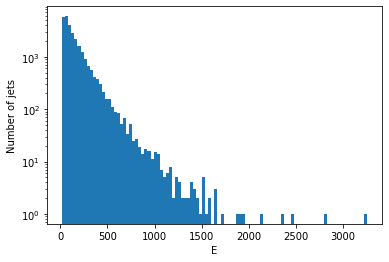

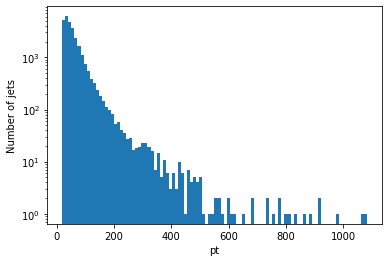

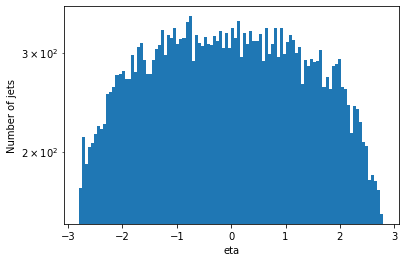

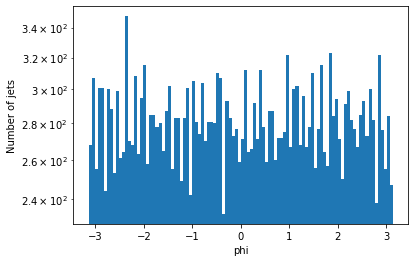

In [34]:
plot_all(data_4d_filtered_df)

In [35]:
x = data_4d_df.values
x_scaled = StandardScaler().fit_transform(x)
data_4d_scaled_df = pd.DataFrame(x_scaled, columns=data_4d_df.keys())

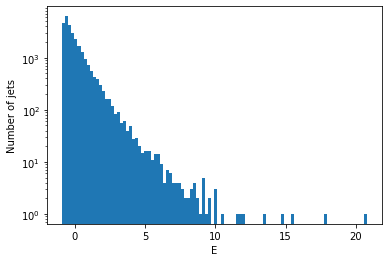

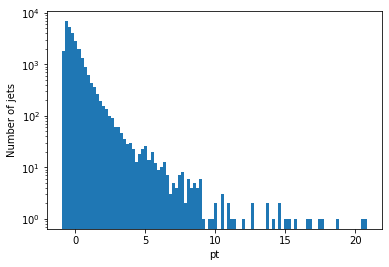

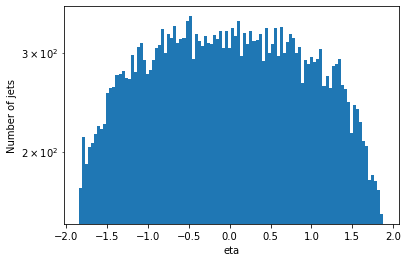

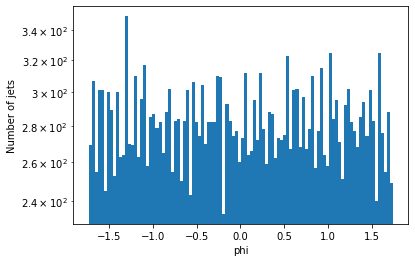

In [37]:
plot_all(data_4d_scaled_df)

In [38]:
data_4d_df = data_5d_df.drop(columns='obj')
data_4d_df = data_4d_df.fillna(0)
data_4d_df = data_4d_df.astype('float32')
data_4d_df['E'] = data_4d_df['E'] / 1000.0
data_4d_df['pt'] = data_4d_df['pt'] / 1000.0

In [39]:
np.min(data_4d_df['pt'])

15.0305

In [41]:
data_4d_df['eta'] = data_4d_df['eta'] / 5
data_4d_df['phi'] = data_4d_df['phi'] / 3
data_4d_df['E'] = np.log10(data_4d_df['E']) + 1 / 1.8
data_4d_df['pt'] = (np.log10(data_4d_df['pt']) - 1.3) / 1.2


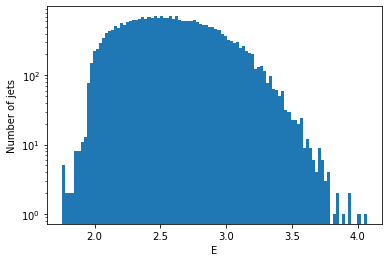

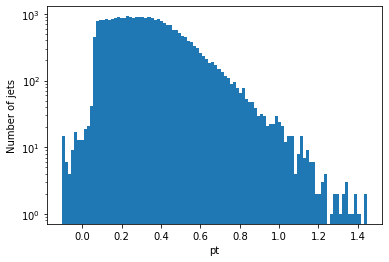

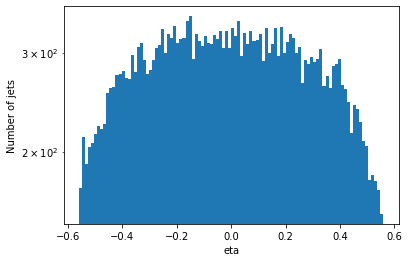

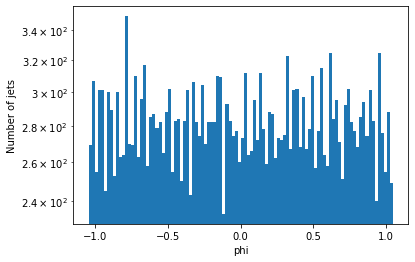

In [43]:
plot_all(data_4d_df)